In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# **DATA UPLOAD**


In [2]:
data = pd.read_csv("MI.data", sep=',',header = None)
column_names = [
    'ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT',
    'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04',
    'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
    'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
new_column_names = {i: col for i, col in enumerate(column_names)}
new_column_names
data.rename(columns=new_column_names, inplace = True)
data.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,...,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77,1,2,1,1,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,180,100,0,0,...,0,138,?,?,?,8,16,4,0,0,1,?,?,?,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,120,90,0,0,...,0,132,0.38,0.18,?,7.8,3,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,100,180,100,0,0,...,0,132,0.3,0.11,?,10.8,?,3,3,0,0,1,1,1,0,1,0,0,3,2,2,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,?,?,120,70,0,0,...,0,146,0.75,0.37,?,?,?,2,0,0,1,?,?,?,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,100,160,90,0,0,...,0,132,0.45,0.22,?,8.3,?,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
columns_drop = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']

In [4]:
interview_columns_raw = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01',
       'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05',
       'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
       'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04',
       'zab_leg_06', 'KFK_BLOOD']
emergency_diagnoses_raw = ['D_AD_KBRIG', 'S_AD_ORIT','ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08','n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06',
 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']
emergency_drugs_raw = []
ICU_diagnoses_raw = ['S_AD_ORIT', 'D_AD_ORIT','O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P',
                 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n']
ICU_drugs_raw= ['fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08',
             'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
             'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']


# **FEATURES AND TARGETS DICTIONARY**

In [5]:
# Table with quick description of every feature/target for a better understanding
"""
-------------------------------------
First word of every category:
Who got the information?
- PD = Patient_Doctor Interview
- ECG = Emergency Cardiology Team
- ICU = Intensive Care Unit

- T = Targets (just last 12 features)

Last word of every category:
How is categorized every feature in general (every case should be analyzed separately)
- Count: once, twice, three times...
- Duration: days, weeks, months, years...
- Category: classes, stages, types...
- YN: Yes or No
- Time: hours, days...
- XLevel: X units (continous)
-------------------------------------
"""
data_desc = data.copy()
# Rename of the column headers for better understanding
column_names_desc = [
    'ID', 'Age', 'Sex', 'PD_MyocardialInfarction_Count','PD_ChestPain_Duration', 'PD_ChestPain_Category',
    'PD_CoronaryHeartDisease_Category', 'PD_HeredityHeartDisease_YN', 'PD_Hyperthesion_Category',
    'PD_SymptomaticHyperthesion_YN', 'PD_Hyperthesion_Duration', 'PD_HeartFailure_Category', 'PD_Arrhythmia1_YN',
    'PD_Arrhythmia2_YN', 'PD_Arrhythmia3_YN','PD_Arrhythmia4_YN', 'PD_Arrhythmia5_YN', 'PD_Arrhythmia6_YN',
    'PD_Arrhythmia7_YN', 'PD_HeartBlock1_YN', 'PD_HeartBlock2_YN', 'PD_HeartBlock3_YN', 'PD_HeartBlock4_YN',
    'PD_HeartBlock5_YN', 'PD_HeartBlock6_YN', 'PD_HeartBlock7_YN', 'PD_Diabetes_YN', 'PD_Obesity_YN',
    'PD_HighThyroidHormone_YN', 'PD_ChronicBronchitis_YN', 'PD_BronchitisObstructive_YN', 'PD_Asthma_YN',
    'PD_ChronicPneumonia_YN', 'PD_PulmonaryTuberculosis_YN', 'ECT_SystolicBloodPressure_mmHgLevel',
    'ECT_DiastolicBloodPressure_mmHgLevel', 'ICU_SystolicBloodPressure_mmHgLevel', 'ICU_DiastolicBloodPressure_mmHgLevel',
    'ICU_PulmonaryEdema_YN', 'ICU_CardiogenicSchock_YN', 'ICU_Arrhythmia1_YN', 'ICU_Arrhythmia2_YN',
    'ICU_Arrhythmia3_YN', 'ICU_Arrhythmia4_YN', 'ICU_MILocalization1_Category', 'ICU_MILocalization2_Category',
    'ICU_MILocalization3_Category', 'ICU_MILocalization4_Category', 'ICU_MILocalization5_YN', 'ECT_HeartRhytm1_YN',
    'ECT_HeartRhytm2_YN', 'ECT_HeartRhytm3_YN', 'ECT_HeartRhytm4_YN', 'ECT_HeartRhytm5_YN', 'ECT_HeartRhytm6_YN',
    'ECT_Arrhythmia1_YN', 'ECT_Arrhythmia2_YN', 'ECT_Arrhythmia3_YN', 'ECT_Arrhythmia4_YN', 'ECT_Arrhythmia5_YN',
    'ECT_Arrhythmia6_YN', 'ECT_Arrhythmia7_YN', 'ECT_Arrhythmia8_YN','ECT_Arrhythmia9_YN', 'ECT_HeartBlock1_YN',
    'ECT_HeartBlock2_YN', 'ECT_HeartBlock3_YN', 'ECT_HeartBlock4_YN', 'ECT_HeartBlock5_YN', 'ECT_HeartBlock6_YN',
    'ECT_HeartBlock7_YN', 'ECT_HeartBlock8_YN', 'ECT_HeartBlock9_YN', 'ECT_HeartBlock10_YN', 'ECT_HeartBlock11_YN',
    'ICU_Drug1_Celasium750k_YN', 'ICU_Drug2_Celasium1m_YN', 'ICU_Drug3_Celasium3m_YN', 'ICU_Drug4_Streptase_YN',
    'ICU_Drug5_Celasium500k_YN', 'ICU_Drug6_Celasium250k_YN', 'ICU_Drug7_Celasium1p5m_YN', 'ICU_Lab1_LowPotassium_YN',
    'ICU_Lab2_Potassium_mmol/LLevel', 'ICU_Lab3_HighSodium_YN', 'ICU_Lab4_Sodium_mmol/LLevel', 'ICU_Lab5_EnzymeAIAT_IU/LLevel',
    'ICU_Lab6_EnzymeASAT_IU/LLevel', 'ICU_Lab7_EnzymeCPK_IU/LLevel', 'ICU_Lab8_WhiteBloodCells_BillionsperLiterLevel',
    'ICU_Lab9_ESRate_mm/hourLevel', 'ICU_HeartAttack_Time', 'ICU_RelapsePain_1stHour_Count', 'ICU_RelapsePain_Day2_Count',
    'ICU_RelapsePain_Day3_Count', 'ECT_Drug1_Opioid_YN', 'ECT_Drug2_NSAIDs_YN', 'ECT_Drug3_Lidocaine_YN',
    'ICU_Drug1_LiquidNitrates_YN', 'ICU_Drug2_Opioid_1stHour_Count', 'ICU_Drug2_Opioid_Day2_Count',
    'ICU_Drug2_Opioid_Day3_Count', 'ICU_Drug3_NSAIDs_1stHour_Count', 'ICU_Drug3_NSAIDs_Day2_Count',
    'ICU_Drug3_NSAIDs_Day3_Count', 'ICU_Drug4_Lidocaine_YN', 'ICU_Drug5_BetaBlockers_YN', 'ICU_Drug6_CalciumBlockers_YN',
    'ICU_Drug7_Anticoagulants_YN', 'ICU_Drug8_Acetylsalicylic_YN', 'ICU_DrugTiclid9_YN', 'ICU_DrugTrental10_YN',
    'T_AtrialFibrillation_YN', 'T_SPTachycardia_YN', 'T_VentricularTachycardia_YN', 'T_VentricularFibrillation_YN',
    'T_3rdDegreeAVBlock_YN', 'T_PulmonaryEdema_YN', 'T_MyocardialRupture_YN', 'T_DresslerSyndrome_YN',
    'T_ChronicHeartFailure_YN', 'T_RelapseIM_YN', 'T_PostAngina_YN', 'T_Lethal_Outcomes']

column_mapping = dict(zip(column_names, column_names_desc))
data_desc.rename(columns=column_mapping, inplace=True)
column_mapping = pd.DataFrame({'Old_Column_Name': column_names, 'New_Column_Name': column_names_desc})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
column_mapping

,Old_Column_Name,New_Column_Name
0,ID,ID
1,AGE,Age
2,SEX,Sex
3,INF_ANAM,PD_MyocardialInfarction_Count
4,STENOK_AN,PD_ChestPain_Duration
5,FK_STENOK,PD_ChestPain_Category
6,IBS_POST,PD_CoronaryHeartDisease_Category
7,IBS_NASL,PD_HeredityHeartDisease_YN
8,GB,PD_Hyperthesion_Category
9,SIM_GIPERT,PD_SymptomaticHyperthesion_YN


# **DATA DESCRIPTION**

Data Types

In [6]:
# Check all column data types
data_types = data.dtypes
data_types_count = data_types.value_counts()

# Print count of data types
print(data_types_count)

#Print all the column data types
for column, dtype in data_types.items():
    print(f"{column}': '{dtype}")

object    110
int64      14
dtype: int64
ID': 'int64
AGE': 'object
SEX': 'int64
INF_ANAM': 'object
STENOK_AN': 'object
FK_STENOK': 'object
IBS_POST': 'object
IBS_NASL': 'object
GB': 'object
SIM_GIPERT': 'object
DLIT_AG': 'object
ZSN_A': 'object
nr_11': 'object
nr_01': 'object
nr_02': 'object
nr_03': 'object
nr_04': 'object
nr_07': 'object
nr_08': 'object
np_01': 'object
np_04': 'object
np_05': 'object
np_07': 'object
np_08': 'object
np_09': 'object
np_10': 'object
endocr_01': 'object
endocr_02': 'object
endocr_03': 'object
zab_leg_01': 'object
zab_leg_02': 'object
zab_leg_03': 'object
zab_leg_04': 'object
zab_leg_06': 'object
S_AD_KBRIG': 'object
D_AD_KBRIG': 'object
S_AD_ORIT': 'object
D_AD_ORIT': 'object
O_L_POST': 'object
K_SH_POST': 'object
MP_TP_POST': 'object
SVT_POST': 'object
GT_POST': 'object
FIB_G_POST': 'object
ant_im': 'object
lat_im': 'object
inf_im': 'object
post_im': 'object
IM_PG_P': 'object
ritm_ecg_p_01': 'object
ritm_ecg_p_02': 'object
ritm_ecg_p_04': 'object
ritm_ec

In [7]:
# Changing all data to float type
data = data.apply(pd.to_numeric, errors='coerce')
data = data.astype(float)

# Print count of new data types
data_types_new = data.dtypes
data_types_count_new = data_types_new.value_counts()
print(data_types_count_new)

#Print all the column data types
for column, dtype in data_types_new.items():
    print(f"{column}': '{dtype}")

float64    124
dtype: int64
ID': 'float64
AGE': 'float64
SEX': 'float64
INF_ANAM': 'float64
STENOK_AN': 'float64
FK_STENOK': 'float64
IBS_POST': 'float64
IBS_NASL': 'float64
GB': 'float64
SIM_GIPERT': 'float64
DLIT_AG': 'float64
ZSN_A': 'float64
nr_11': 'float64
nr_01': 'float64
nr_02': 'float64
nr_03': 'float64
nr_04': 'float64
nr_07': 'float64
nr_08': 'float64
np_01': 'float64
np_04': 'float64
np_05': 'float64
np_07': 'float64
np_08': 'float64
np_09': 'float64
np_10': 'float64
endocr_01': 'float64
endocr_02': 'float64
endocr_03': 'float64
zab_leg_01': 'float64
zab_leg_02': 'float64
zab_leg_03': 'float64
zab_leg_04': 'float64
zab_leg_06': 'float64
S_AD_KBRIG': 'float64
D_AD_KBRIG': 'float64
S_AD_ORIT': 'float64
D_AD_ORIT': 'float64
O_L_POST': 'float64
K_SH_POST': 'float64
MP_TP_POST': 'float64
SVT_POST': 'float64
GT_POST': 'float64
FIB_G_POST': 'float64
ant_im': 'float64
lat_im': 'float64
inf_im': 'float64
post_im': 'float64
IM_PG_P': 'float64
ritm_ecg_p_01': 'float64
ritm_ecg_p_02': 

Null Values

In [8]:
data_null = data.isnull().values.any() # there are null values
data_NA = data.isna().values.any() # there are NA values
data.replace('?', pd.NA, inplace=True) # replace question marks with NA

data_nulls_sum = data.isnull().sum() # check how many null values are in every feature
print(data_nulls_sum)

ID                  0
AGE                 8
SEX                 0
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im    

## Get rid of collumns with too many missing values

In [9]:
data.drop(['IBS_NASL','S_AD_KBRIG','D_AD_KBRIG','KFK_BLOOD'],axis = 1, inplace = True)

## Change unranked categorical data

In [10]:
one_hot_data_angina_pectoris = pd.get_dummies(data['STENOK_AN'].astype(str))
column_mapping = {
    '0.0': 'Angina never',
    '1.0': 'Angina during last year',
    '2.0': 'Angina one year ago',
    '3.0': 'Angina two years ago',
    '4.0': 'Angina three years ago',
    '5.0': 'Angina 4-5 years ago',
    '6.0': 'Angina >5 years ago',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_angina_pectoris.rename(columns=column_mapping)
#get rid of the never option to avoid the dummy variable trap
one_hot_data.drop(['Angina never','nan'],axis = 1,inplace = True)
data.drop(['STENOK_AN'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [11]:
one_hot_data_heart_failure = pd.get_dummies(data['ZSN_A'].astype(str))
column_mapping = {
    '0.0': 'no heart failure',
    '1.0': 'stage I heart failure',
    '2.0': 'stage II heart failure right vs',
    '3.0': 'stage II heart failure left vs',
    '4.0': 'stage IIB heart failure',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_heart_failure.rename(columns=column_mapping)
#get rid of the no option to avoid the dummy variable trap
one_hot_data.drop(['no heart failure','nan'],axis = 1,inplace = True)
data.drop(['ZSN_A'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [12]:
one_hot_data_anterior_MI = pd.get_dummies(data['ant_im'].astype(str))
column_mapping = {
    '0.0': 'no anterior MI',
    '1.0': 'anterior no QRS change',
    '2.0': 'anterior QR',
    '3.0': 'anterior Qr',
    '4.0': 'anterior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_anterior_MI.rename(columns=column_mapping)
#get rid of the no option to avoid the dummy variable trap
one_hot_data.drop(['no anterior MI','nan'],axis = 1,inplace = True)
data.drop(['ant_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [13]:
one_hot_data_lateral_MI = pd.get_dummies(data['lat_im'].astype(str))
column_mapping = {
    '0.0': 'no lateral MI',
    '1.0': 'lateral no QRS change',
    '2.0': 'lateral QR',
    '3.0': 'lateral Qr',
    '4.0': 'lateral QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_lateral_MI.rename(columns=column_mapping)
#get rid of the no option to avoid the dummy variable trap
one_hot_data.drop(['no lateral MI','nan'],axis = 1,inplace = True)
data.drop(['lat_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [14]:

one_hot_data_inferior_MI = pd.get_dummies(data['inf_im'].astype(str))
column_mapping = {
    '0.0': 'no inferior MI',
    '1.0': 'inferior no QRS change',
    '2.0': 'inferior QR',
    '3.0': 'inferior Qr',
    '4.0': 'inferior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_inferior_MI.rename(columns=column_mapping)
#get rid of the no option to avoid the dummy variable trap
one_hot_data.drop(['no inferior MI','nan'],axis = 1,inplace = True)
data.drop(['inf_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [15]:
one_hot_data_posterior_MI = pd.get_dummies(data['post_im'].astype(str))
column_mapping = {
    '0.0': 'no posterior MI',
    '1.0': 'posterior no QRS change',
    '2.0': 'posterior QR',
    '3.0': 'posterior Qr',
    '4.0': 'posterior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_posterior_MI.rename(columns=column_mapping)
#get rid of the no option to avoid the dummy variable trap
one_hot_data.drop(['no posterior MI','nan'],axis = 1,inplace = True)
data.drop(['post_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [16]:
interview_columns = ['AGE', 'SEX', 'INF_ANAM', 'FK_STENOK', 'IBS_POST',
       'GB', 'SIM_GIPERT', 'DLIT_AG', 'nr_11', 'nr_01',
       'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05',
       'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
       'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04',
       'zab_leg_06', 'Angina during last year', 'Angina one year ago',
       'Angina two years ago', 'Angina three years ago',
       'Angina 4-5 years ago', 'Angina >5 years ago', 'stage I heart failure', 'stage II heart failure right vs',
       'stage II heart failure left vs', 'stage IIB heart failure']
emergency_diagnoses = ['S_AD_ORIT','ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08','n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06',
 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']
emergency_drugs = []
ICU_diagnoses = ['S_AD_ORIT', 'D_AD_ORIT','O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'anterior no QRS change', 'anterior QR', 'anterior Qr', 'anterior QS', 'lateral no QRS change', 'lateral QR', 'lateral Qr', 'lateral QS', 'inferior no QRS change', 'inferior QR', 'inferior Qr', 'inferior QS', 'posterior no QRS change', 'posterior QR', 'posterior Qr',
       'posterior QS', 'IM_PG_P',
                 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD','L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n']
ICU_drugs= ['fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08',
             'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
             'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

## **Exploratory Data Analysis**

**AGE**

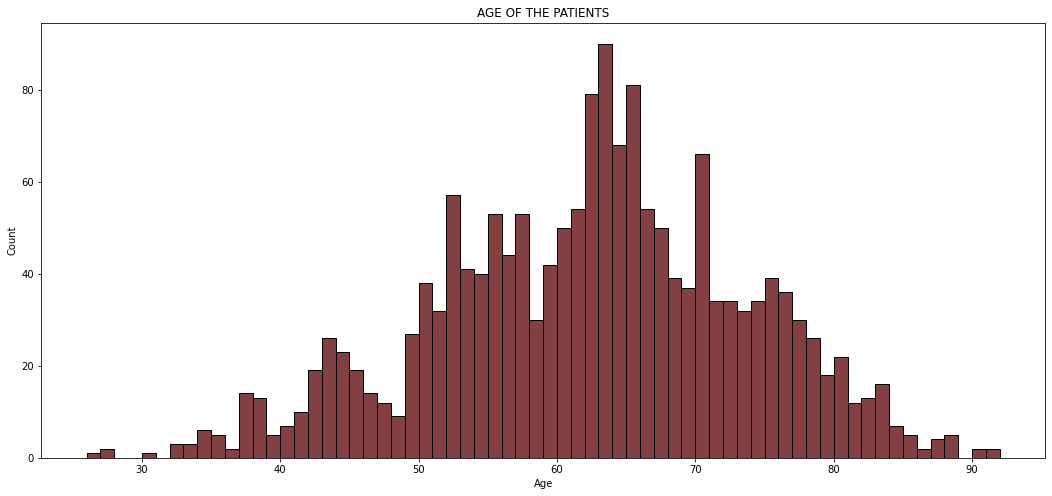

In [17]:
age_count = data['AGE'].value_counts().sort_index()
sorted_ages = data['AGE'].dropna().sort_values() #had to sort as they were unordered
plt.figure(figsize=(18,8)) #just making sure we have a big enough plot to display all ages clearly
sns.histplot(sorted_ages, binwidth = 1, color = "#590004")
plt.title("AGE OF THE PATIENTS")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**SEX**

Male      1065
Female     635
Name: SEX, dtype: int64


Text(0, 0.5, 'Count')

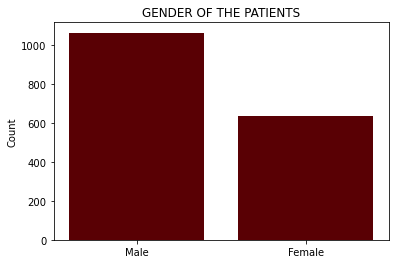

In [18]:
gender_count = data['SEX'].value_counts()
gender_count_map = gender_count.rename({0: 'Female', 1: 'Male'})
print(gender_count_map)

gender_categories = ['Male', 'Female']
plt.bar(gender_categories, gender_count, color = "#590004")
plt.title("GENDER OF THE PATIENTS")
plt.ylabel("Count")

**Previous Myocardial Infarctions**

0      1060
1       410
2       147
=>3      79
Name: INF_ANAM, dtype: int64


Text(0.5, 0, 'Number of Previous Myocardial Infarctions')

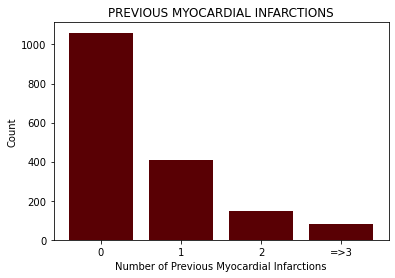

In [19]:

myo_infar_count = data['INF_ANAM'].value_counts()
myo_infar_map = myo_infar_count.rename({0: '0', 1: '1', 2: '2', 3: '=>3'})
print(myo_infar_map)

myoinfar_categories = ['0', '1', '2', '=>3']
plt.bar(myoinfar_categories, myo_infar_count, color = "#590004")
plt.title("PREVIOUS MYOCARDIAL INFARCTIONS")
plt.ylabel("Count")
plt.xlabel("Number of Previous Myocardial Infarctions")

**Coronary Heard Disease**

Unstable angina pectoris      683
Exertional angina pectoris    548
None                          418
Name: IBS_POST, dtype: int64


Text(0, 0.5, 'Count')

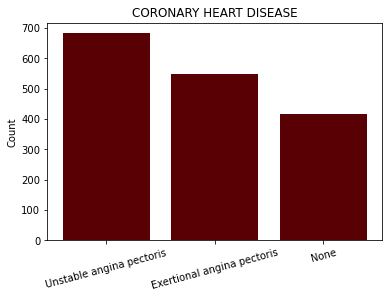

In [20]:
chd_count = data['IBS_POST'].value_counts()
chd_count_map = chd_count.rename({0: 'None', 1: 'Exertional angina pectoris', 2: 'Unstable angina pectoris'})
print(chd_count_map)

chd_categories = ['Unstable angina pectoris', 'Exertional angina pectoris', 'None']
plt.bar(chd_categories, chd_count, color = "#590004")
plt.xticks(rotation = 15)
plt.title("CORONARY HEART DISEASE")
plt.ylabel("Count")

**Heredity**

In [21]:
# heredity_count = data['IBS_NASL'].value_counts()
# heredity_count_map = heredity_count.rename({'0': 'No', "1": 'Yes'})
# print(heredity_count_map)

# heredity_categories = ['No', 'Yes']
# plt.bar(heredity_categories, heredity_count, color = "#590004")
# plt.title("HEREDITY OF CHD")
# plt.ylabel("Count")
#many empty values here

**Diabetes**

No     1461
Yes     228
Name: endocr_01, dtype: int64


Text(0, 0.5, 'Count')

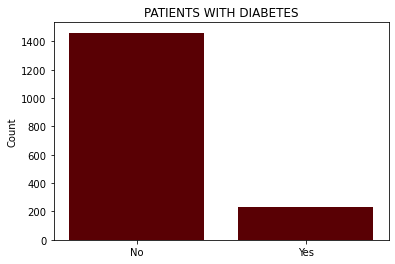

In [22]:
diabetes_count = data['endocr_01'].value_counts()
diabetes_count_map = diabetes_count.rename({0: 'No', 1: 'Yes'})
print(diabetes_count_map)

diabetes_categories = ['No', 'Yes']
plt.bar(diabetes_categories, diabetes_count, color = "#590004")
plt.title("PATIENTS WITH DIABETES")
plt.ylabel("Count")

**Obesity**

No     1648
Yes      42
Name: endocr_02, dtype: int64


Text(0, 0.5, 'Count')

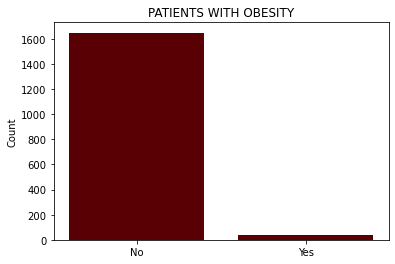

In [23]:
obesity_count = data['endocr_02'].value_counts()
obesity_count_map = obesity_count.rename({0: 'No', 1: 'Yes'})
print(obesity_count_map)

obesity_categories = ['No', 'Yes']
plt.bar(obesity_categories, obesity_count, color = "#590004")
plt.title("PATIENTS WITH OBESITY")
plt.ylabel("Count")

**Administration of different drugs by ECT**

In [24]:
drugs = [("Opiod", 'NA_KB'), ("NSAIDs", 'NOT_NA_KB'), ("Lidocaine", 'LID_KB'), ("Liquid Nitrates", 'LID_KB')] #####
cols = []
for drug, column_name in drugs:
        column = data[column_name].sort_values()
        count = column.value_counts()
        print(f"{drug} administered: {count.get(1, 0)}")
        print(f"{drug} not administered: {count.get(0, 0)}")
        cols.append(column_name)
        print('\n')
drug_emergency_cols = data[cols]
null_counts = drug_emergency_cols.isnull().all().sum()
print(null_counts) #in all cases some drug was administred

Opiod administered: 618
Opiod not administered: 425


NSAIDs administered: 701
NSAIDs not administered: 313


Lidocaine administered: 396
Lidocaine not administered: 627


Liquid Nitrates administered: 396
Liquid Nitrates not administered: 627


0


**Administrarion of different drugs in the ICU**

In [25]:
drugs = [("opiod first hour", 'NA_R_1_n'), ("opiods second day", 'NA_R_2_n'), ("opiods third day", 'NA_R_3_n'), ("liquid nitrates", 'NITR_S'),
        ("NSAIDs first hours", "NOT_NA_1_n"), ("NSAIDs second day", 'NOT_NA_2_n'), ("NSAIDs third day", 'NOT_NA_3_n'), ("lidocaine", 'LID_S_n'),
        ("beta-blockers", 'B_BLOK_S_n'), ("calcium channel blockers", 'ANT_CA_S_n'), ("anticoagulants", 'GEPAR_S_n'), ("acetylsalicylic", 'ASP_S_n'),
         ("Ticlid", 'TIKL_S_n'), ("Trental", 'TRENT_S_n')]

#just counting if was administered or not - not how many times it was administered
for drug, column_name in drugs:
    column = data[column_name].sort_values()
    count = column.value_counts()
    administered_count = np.sum(np.fromiter((count.get(i, 0) for i in range(1, 5)), dtype=int))  # Counting values greater than or equal to 1
    print(f"{drug} administered: {administered_count}")
    print(f"{drug} not administered: {count.get(0.0, 0)}")
    print('\n')

opiod first hour administered: 587
opiod first hour not administered: 1108


opiods second day administered: 118
opiods second day not administered: 1474


opiods third day administered: 76
opiods third day not administered: 1493


liquid nitrates administered: 195
liquid nitrates not administered: 1496


NSAIDs first hours administered: 453
NSAIDs first hours not administered: 1237


NSAIDs second day administered: 136
NSAIDs second day not administered: 1454


NSAIDs third day administered: 95
NSAIDs third day not administered: 1474


lidocaine administered: 479
lidocaine not administered: 1211


beta-blockers administered: 215
beta-blockers not administered: 1474


calcium channel blockers administered: 1125
calcium channel blockers not administered: 562


anticoagulants administered: 1203
anticoagulants not administered: 480


acetylsalicylic administered: 1252
acetylsalicylic not administered: 431


Ticlid administered: 30
Ticlid not administered: 1654


Trental administered: 341


In [26]:
drugs = [("opiod first hour", 'NA_R_1_n'), ("opiods second day", 'NA_R_2_n'), ("opiods third day", 'NA_R_3_n'), ("liquid nitrates", 'NITR_S'),
        ("NSAIDs second day", 'NOT_NA_2_n'), ("NSAIDs third day", 'NOT_NA_3_n'), ("lidocaine", 'LID_S_n'), ("beta-blockers", 'B_BLOK_S_n'),
        ("calcium channel blockers", 'ANT_CA_S_n'), ("anticoagulants", 'GEPAR_S_n'), ("acetylsalicylic", 'ASP_S_n'), ("Ticlid", 'TRENT_S_n')]
for drug, column_name in drugs:
        column = data[column_name].sort_values()
        count = column.value_counts()
        if drug == "NSAIDs second day":
            #special case handling for this column
            print(f"administration of NSAIDs in first hours of hospital period: {data['NOT_NA_1_n'].value_counts()}")
            print('\n')
        print(f"{drug} administered: {count.get(1, 0)}")
        print(f"{drug} not administered: {count.get(0, 0)}")
        print('\n')

opiod first hour administered: 409
opiod first hour not administered: 1108


opiods second day administered: 87
opiods second day not administered: 1474


opiods third day administered: 60
opiods third day not administered: 1493


liquid nitrates administered: 195
liquid nitrates not administered: 1496


administration of NSAIDs in first hours of hospital period: 0.0    1237
1.0     376
2.0      53
3.0      17
4.0       7
Name: NOT_NA_1_n, dtype: int64


NSAIDs second day administered: 95
NSAIDs second day not administered: 1454


NSAIDs third day administered: 57
NSAIDs third day not administered: 1474


lidocaine administered: 479
lidocaine not administered: 1211


beta-blockers administered: 215
beta-blockers not administered: 1474


calcium channel blockers administered: 1125
calcium channel blockers not administered: 562


anticoagulants administered: 1203
anticoagulants not administered: 480


acetylsalicylic administered: 1252
acetylsalicylic not administered: 431


Ticlid admin

#### Distribution of target variables (without lethal outcome) ####

Counts for FIBR_PREDS:
0.0    1530
1.0     170
Name: FIBR_PREDS, dtype: int64
Counts for PREDS_TAH:
0.0    1680
1.0      20
Name: PREDS_TAH, dtype: int64
Counts for JELUD_TAH:
0.0    1658
1.0      42
Name: JELUD_TAH, dtype: int64
Counts for FIBR_JELUD:
0.0    1629
1.0      71
Name: FIBR_JELUD, dtype: int64
Counts for A_V_BLOK:
0.0    1643
1.0      57
Name: A_V_BLOK, dtype: int64
Counts for OTEK_LANC:
0.0    1541
1.0     159
Name: OTEK_LANC, dtype: int64
Counts for RAZRIV:
0.0    1646
1.0      54
Name: RAZRIV, dtype: int64
Counts for DRESSLER:
0.0    1625
1.0      75
Name: DRESSLER, dtype: int64
Counts for ZSN:
0.0    1306
1.0     394
Name: ZSN, dtype: int64
Counts for REC_IM:
0.0    1541
1.0     159
Name: REC_IM, dtype: int64
Counts for P_IM_STEN:
0.0    1552
1.0     148
Name: P_IM_STEN, dtype: int64


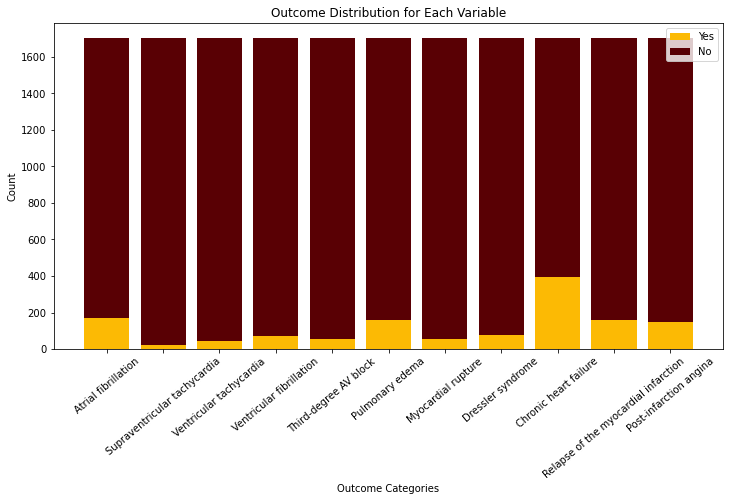

In [27]:
outcome = data[['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN']]

categories = ["Atrial fibrillation", "Supraventricular tachycardia", "Ventricular tachycardia", "Ventricular fibrillation", "Third-degree AV block",
              "Pulmonary edema", "Myocardial rupture", "Dressler syndrome", "Chronic heart failure", "Relapse of the myocardial infarction",
              "Post-infarction angina"]
for column in outcome.columns:
    print(f"Counts for {column}:")
    print(outcome[column].value_counts())

yes_counts = outcome.eq(1).sum()
no_counts = outcome.eq(0).sum()

plt.figure(figsize=(12, 6))
plt.bar(categories, yes_counts, label='Yes', color="#FCBA04")
plt.bar(categories, no_counts, bottom=yes_counts, label='No', color = "#590004")
plt.title("Outcome Distribution for Each Variable")
plt.xlabel("Outcome Categories")
plt.ylabel("Count")
plt.xticks(rotation=40)
plt.legend()
plt.show()

**Lethal outcome**

Alive                                   1429
Cardiogenic shock                        110
Pulmonary edema                           18
Myocardial rupture                        54
Progress of congestive heart failure      23
Thromboembolism                           12
Asystole                                  27
Ventricular fibrillation                  27
Name: LET_IS, dtype: int64


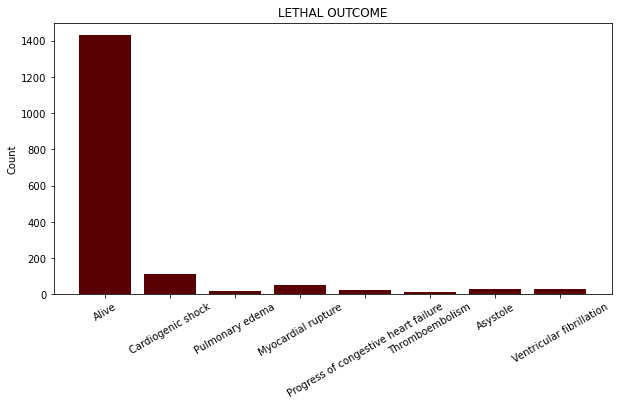

In [28]:
outcome_count = data['LET_IS'].value_counts().sort_index()
outcome_count_map = outcome_count.rename({0: 'Alive', 1: 'Cardiogenic shock', 2: 'Pulmonary edema',
                                          3: 'Myocardial rupture', 4: 'Progress of congestive heart failure',
                                          5: 'Thromboembolism', 6: 'Asystole', 7: 'Ventricular fibrillation'})
print(outcome_count_map)
outcome_categories = ['Alive', 'Cardiogenic shock', 'Pulmonary edema', 'Myocardial rupture', 'Progress of congestive heart failure',
                                'Thromboembolism', 'Asystole', 'Ventricular fibrillation']
plt.figure(figsize=(10, 5))
plt.bar(outcome_categories, outcome_count, color = "#590004")
plt.title("LETHAL OUTCOME")
plt.xticks(rotation = 30)
plt.ylabel("Count")
plt.show()

In [29]:
data[]

SyntaxError: invalid syntax (3043779595.py, line 1)

**Time elapsed from beginning of heart attack to the hospital**

2-4h      198
4-6h      360
4-6h      175
6-8h       87
8-12h      92
12-24h    151
>1d       141
>2d       101
>3d       269
Name: TIME_B_S, dtype: int64


Text(0, 0.5, 'Count')

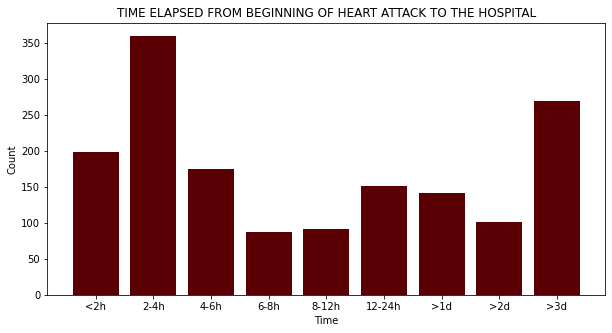

In [30]:
time_count = data['TIME_B_S'].value_counts().sort_index()
time_count_map = time_count.rename({0: '< 2h', 1: '2-4h', 2: '4-6h',
                                          3: '4-6h', 4: '6-8h',
                                          5: '8-12h', 6: '12-24h', 7: '>1d', 8: '>2d', 9: '>3d'})
print(time_count_map)

time_categories = ["<2h", "2-4h", "4-6h", "6-8h", "8-12h", "12-24h", ">1d", ">2d", ">3d"]
plt.figure(figsize=(10,5))
plt.bar(time_categories, time_count, color = "#590004")
plt.title("TIME ELAPSED FROM BEGINNING OF HEART ATTACK TO THE HOSPITAL")
plt.xlabel("Time")
plt.ylabel("Count")

## **Impute Missing values**

Since the proportion of missing values is high in some features, simple imputation methods (mean, median, mode) may not be appropriate as they can introduce bias and distort the distribution of the data. Instead, a more sophisticated imputation is chosen, KNN Imputer

In [17]:
minimum_count_columns = data.count()[data.count() < 400].index.tolist()
print(minimum_count_columns)

[]


Get rid of features with too few entries to start with

In [18]:
minimum_count_columns = data.count()[data.count() > 400].index.tolist()
print(len(minimum_count_columns))
data = data[minimum_count_columns]
data_nulls_sum = data.isnull().sum() # check how many null values are in every feature

140


In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# Iterate over features with missing values
for feature, count in data_nulls_sum.items():
    # Check if the feature has missing values
    if count > 0:
        # Impute missing values in the feature using KNNImputer
        data[feature] = imputer.fit_transform(data[[feature]])

# Save data with no missing values
data_imputed = data.copy()

In [20]:
# Check if there are still null or NA values
data_null = data.isnull().values.any() # no null values
data_NA = data.isna().values.any() # no NA values
print(data_null)
print(data_NA)

False
False


## Some correlation analysis between features

first I want to put our lethality variables into different categories

In [21]:
one_hot_data = pd.get_dummies(data['LET_IS'].astype(str))
column_mapping = {
    '0.0': 'unknown (alive)',
    '1.0': 'cardiogenic_shock',
    '2.0': 'pulmonary_edema',
    '3.0': 'myocardial_rupture',
    '4.0': 'poc_heart_failure',
    '5.0': 'thromboembolism',
    '6.0': 'asystole',
    '7.0': 'ventricular_fibrillation'
}

# Rename the columns using the mapping
one_hot_data = one_hot_data.rename(columns=column_mapping)
one_hot_data.drop(['unknown (alive)'],axis = 1, inplace = True)
data_modified = data.copy()
data_modified.drop(['LET_IS'],axis = 1, inplace = True)
data_modified = pd.concat([data_modified, one_hot_data], axis=1)

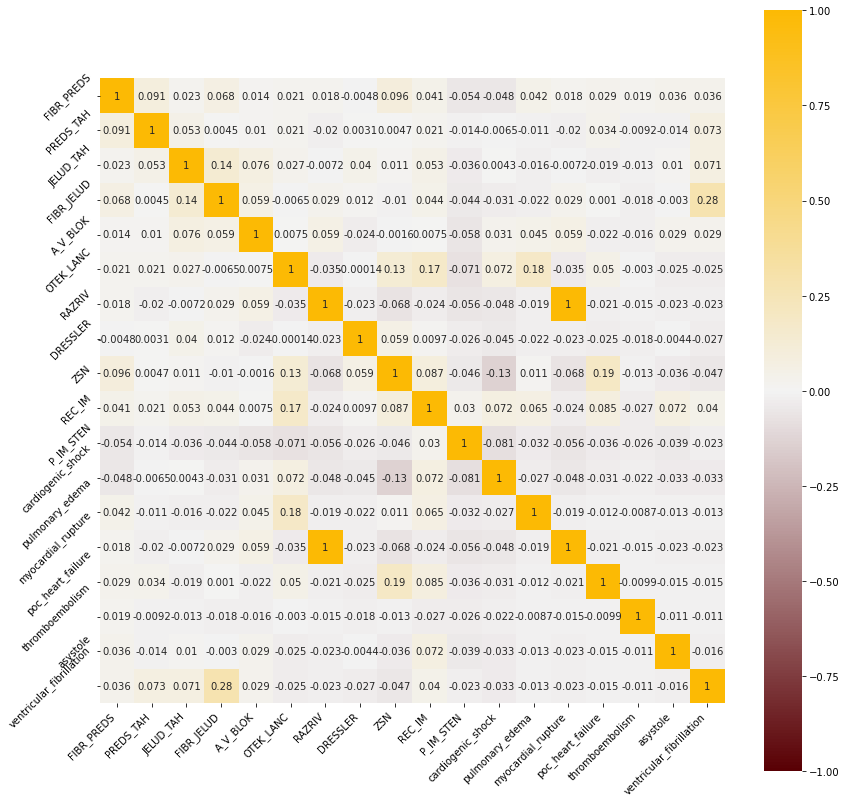

In [22]:
from matplotlib.colors import LinearSegmentedColormap
target_variables = ["FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD",
                   "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER",
                   "ZSN", "REC_IM", "P_IM_STEN", "cardiogenic_shock","pulmonary_edema","myocardial_rupture","poc_heart_failure","thromboembolism","asystole","ventricular_fibrillation"]
corr = data_modified[target_variables].corr()

plt.figure(figsize=(14,14))
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#590004","#F3F3F3","#FCBA04" ])

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=custom_cmap,
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
);

## Let's reassure ourselves, with some logistic regressions

In [23]:
data_modified['myocardial_rupture'] = data_modified['myocardial_rupture'].astype('category').cat.codes
data_modified['ventricular_fibrillation'] = data_modified['ventricular_fibrillation'].astype('category').cat.codes
data_modified['poc_heart_failure'] = data_modified['poc_heart_failure'].astype('category').cat.codes
data_modified['pulmonary_edema'] = data_modified['pulmonary_edema'].astype('category').cat.codes
data_modified['cardiogenic_shock'] = data_modified['cardiogenic_shock'].astype('category').cat.codes


In [24]:
import statsmodels.formula.api as sm
# logistic regression fit
reg = sm.logit(formula='myocardial_rupture ~ FIBR_PREDS + PREDS_TAH + JELUD_TAH + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 0.131809
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     myocardial_rupture   No. Observations:                 1700
Model:                          Logit   Df Residuals:                     1689
Method:                           MLE   Df Model:                           10
Date:                Thu, 16 May 2024   Pseudo R-squ.:                 0.06402
Time:                        11:03:34   Log-Likelihood:                -224.07
converged:                      False   LL-Null:                       -239.40
Covariance Type:            nonrobust   LLR p-value:                 0.0006695
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1352      0.168    -18.611      0.000      -3.465      -2.805
FIBR_PREDS     0.4136      0.421      0.983      0.326      -0.41

C:\Users\Jasmine\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Note: since RAZRIV is perfectly correlated with death due to myocardial rupture, we need to take it out of the regression

In [25]:
# logistic regression fit
reg = sm.logit(formula='ventricular_fibrillation ~ FIBR_PREDS + PREDS_TAH + JELUD_TAH + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + RAZRIV + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 0.061259
         Iterations: 35
                              Logit Regression Results                              
Dep. Variable:     ventricular_fibrillation   No. Observations:                 1700
Model:                                Logit   Df Residuals:                     1688
Method:                                 MLE   Df Model:                           11
Date:                      Thu, 16 May 2024   Pseudo R-squ.:                  0.2488
Time:                              11:03:35   Log-Likelihood:                -104.14
converged:                            False   LL-Null:                       -138.63
Covariance Type:                  nonrobust   LLR p-value:                 1.904e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6249      0.313    -14.755      0.000      -5.239      -4.011
FIBR_PREDS     0.

C:\Users\Jasmine\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Here we can see, that ventricular fibrillation has the strongest (and most significant) impact

In [26]:
# logistic regression fit
reg = sm.logit(formula='poc_heart_failure ~ FIBR_PREDS + PREDS_TAH  + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + RAZRIV + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 0.052278
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:      poc_heart_failure   No. Observations:                 1700
Model:                          Logit   Df Residuals:                     1689
Method:                           MLE   Df Model:                           10
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.2704
Time:                        11:03:37   Log-Likelihood:                -88.873
converged:                      False   LL-Null:                       -121.81
Covariance Type:            nonrobust   LLR p-value:                 2.757e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5132      0.726     -8.969      0.000      -7.936      -5.090
FIBR_PREDS     0.0904      0.586      0.154      0.877      -1.05

C:\Users\Jasmine\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Once again we have the strongest effect from ZSN. However, REC_IM, relapse of myocardial infarction has a significant effect as well!

In [27]:
# logistic regression fit
reg = sm.logit(formula='pulmonary_edema ~ FIBR_PREDS + PREDS_TAH + JELUD_TAH + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + RAZRIV + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 0.046047
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        pulmonary_edema   No. Observations:                 1700
Model:                          Logit   Df Residuals:                     1688
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.2154
Time:                        11:03:41   Log-Likelihood:                -78.280
converged:                      False   LL-Null:                       -99.769
Covariance Type:            nonrobust   LLR p-value:                 1.096e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3603      0.429    -12.496      0.000      -6.201      -4.520
FIBR_PREDS     1.0165      0.604      1.683      0.092      -0.16

C:\Users\Jasmine\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Even in this casethe right variable is significant and has the strongest effect on the desired lethal outcome.
We can therefore say that our assumptions from the correlation analysis are not strongly affected by other complications

In [28]:
#now let's do the cardiogenic shock
reg = sm.logit(formula='cardiogenic_shock ~ FIBR_PREDS + PREDS_TAH + JELUD_TAH + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + RAZRIV + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 5.595117
         Iterations: 35


LinAlgError: Singular matrix

Here the regression fails if we add all complications. There are some ways to fix this, but for the moment I do not think that it is worth the time

## Dimensionality reduction complete

Explained Variance Ratio: [7.42327091e-01 1.03272148e-01 6.70528346e-02 3.85763794e-02
 2.32437866e-02 7.58452527e-03 5.40471062e-03 5.02920482e-03
 9.32426494e-04 5.69621379e-04 4.00071431e-04 3.66788995e-04
 3.56000815e-04 3.24545086e-04 2.89357245e-04 2.31191841e-04
 2.16916196e-04 1.99487379e-04 1.89977899e-04 1.72785469e-04
 1.55379934e-04 1.41931591e-04 1.33100570e-04 1.28150448e-04
 1.20786796e-04 1.09786126e-04 1.03577874e-04 1.01669815e-04
 9.71407196e-05 9.32128264e-05 8.53631028e-05 8.37388378e-05
 8.10602595e-05 7.97600531e-05 7.85245840e-05 7.72216930e-05
 7.04744483e-05 6.70051485e-05 6.58748876e-05 6.41931288e-05
 6.03925348e-05 5.71285607e-05 5.43817187e-05 5.26672180e-05
 4.93023838e-05 4.84528882e-05 4.74667815e-05 4.65718172e-05
 4.16988508e-05 3.95992003e-05 3.88387769e-05 3.67711615e-05
 3.50660931e-05 3.40749367e-05 3.26821506e-05 3.20852031e-05
 3.00546205e-05 2.74635562e-05 2.49738431e-05 2.43132399e-05
 2.40228922e-05 2.32226945e-05 2.13323971e-05 2.03362907e-0

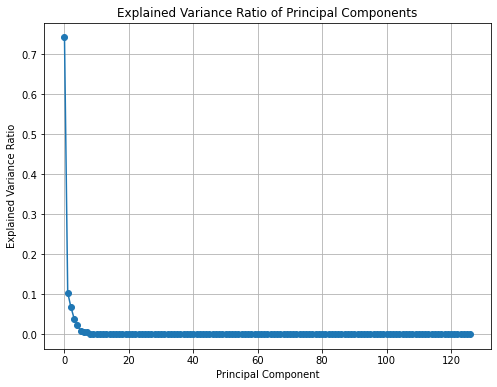

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exclude 'ID' column
data = data.drop(columns=['ID'])

# Separate features
X = data.drop(columns=['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
                       'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'])

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)

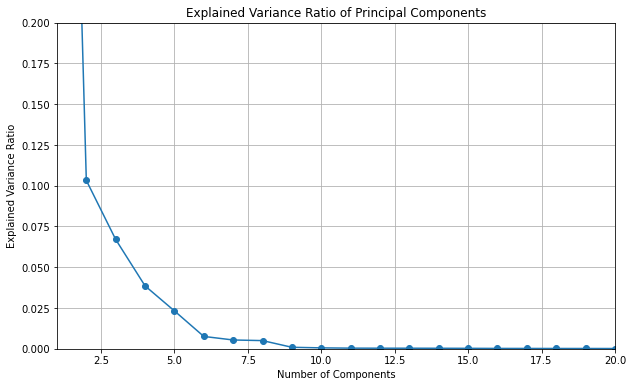

In [30]:
import numpy as np

# Generate a range of component numbers
n_components = len(pca.explained_variance_ratio_)
component_numbers = np.arange(1, n_components + 1)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(component_numbers, pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)

# Zoom in on a specific range of components
plt.xlim(1, 20)
plt.ylim(0, 0.2)

plt.show()

In [31]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

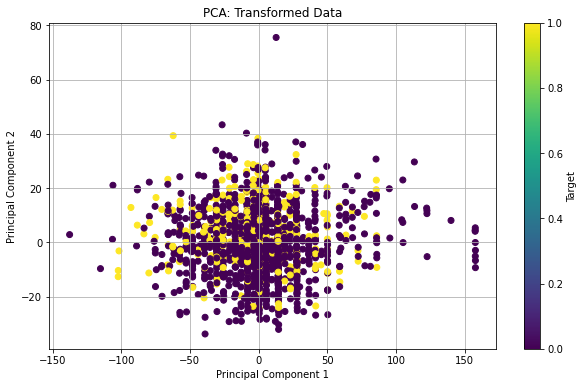

Loadings of each feature on the principal components:
[[-8.45431028e-03  1.19455536e-03  2.15178224e-03  2.40469887e-04
  -2.51901463e-05 -8.73512000e-03 -4.47437391e-04 -2.33851485e-02
  -1.84281063e-05  1.65065116e-05  1.05969781e-04  1.35366032e-05
  -1.16937898e-04 -1.46285010e-06  9.10052815e-05  1.18625298e-06
   1.47610084e-05  8.63306141e-05  6.26552848e-07 -1.06903905e-05
   8.23085250e-07  3.90648042e-05 -7.45320519e-04 -1.12292196e-04
  -3.92729174e-05 -6.88332383e-05  8.81113942e-04  6.10682622e-05
   2.88641542e-05 -6.09589992e-05 -8.79179366e-01 -4.75288891e-01
   6.02771161e-04  2.36222158e-03  3.53146389e-04  6.28929397e-05
   1.93351539e-04  3.20567054e-04  4.67684457e-04 -1.44362484e-03
   2.64706119e-04  4.89555866e-04 -5.68106233e-08  4.86967439e-04
   1.69811181e-04 -2.16764880e-04  3.69818953e-05 -2.59063761e-04
   1.05593471e-04  3.22170187e-04  6.48152679e-05  6.36973311e-05
   3.57130778e-05  1.78166164e-05  2.24553644e-05  2.18874887e-04
   7.35127403e-05  4.7

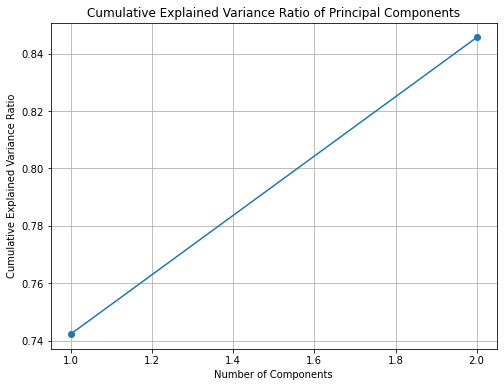

In [32]:
y = data['ZSN']
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Transformed Data')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()
# Analyze the loadings of each feature on the principal components
loadings = pca.components_
print("Loadings of each feature on the principal components:")
print(loadings)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create an array for the component numbers
component_numbers = np.arange(1, len(cumulative_variance_ratio) + 1)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(component_numbers, cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

In [33]:
# Print the coefficients of the first principal component
print("Coefficients of the first principal component:")
print(pca.components_[0])

Coefficients of the first principal component:
[-8.45431028e-03  1.19455536e-03  2.15178224e-03  2.40469887e-04
 -2.51901463e-05 -8.73512000e-03 -4.47437391e-04 -2.33851485e-02
 -1.84281063e-05  1.65065116e-05  1.05969781e-04  1.35366032e-05
 -1.16937898e-04 -1.46285010e-06  9.10052815e-05  1.18625298e-06
  1.47610084e-05  8.63306141e-05  6.26552848e-07 -1.06903905e-05
  8.23085250e-07  3.90648042e-05 -7.45320519e-04 -1.12292196e-04
 -3.92729174e-05 -6.88332383e-05  8.81113942e-04  6.10682622e-05
  2.88641542e-05 -6.09589992e-05 -8.79179366e-01 -4.75288891e-01
  6.02771161e-04  2.36222158e-03  3.53146389e-04  6.28929397e-05
  1.93351539e-04  3.20567054e-04  4.67684457e-04 -1.44362484e-03
  2.64706119e-04  4.89555866e-04 -5.68106233e-08  4.86967439e-04
  1.69811181e-04 -2.16764880e-04  3.69818953e-05 -2.59063761e-04
  1.05593471e-04  3.22170187e-04  6.48152679e-05  6.36973311e-05
  3.57130778e-05  1.78166164e-05  2.24553644e-05  2.18874887e-04
  7.35127403e-05  4.74248224e-05  6.6005945

In [34]:
explained_variance_ratio = pca.explained_variance_ratio_[:2]

print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
  print(f"Principal Component {i+1}: {ratio:.4f}")

Explained Variance Ratio:
Principal Component 1: 0.7423
Principal Component 2: 0.1033


## Dimensionality reduction diagnoses
Here we will only take the input variables which were not any administered drugs

In [35]:
features_of_interest = interview_columns.copy()
features_of_interest.extend(ICU_diagnoses)
features_of_interest.extend(emergency_diagnoses)

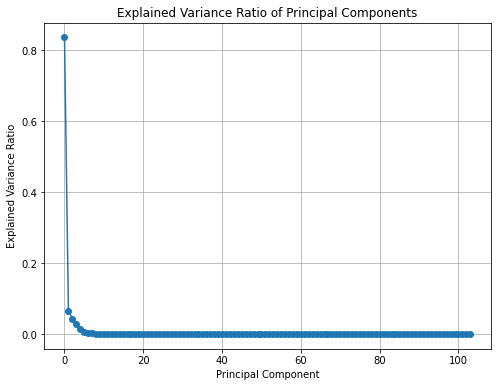

In [36]:
# Separate features
X = data[features_of_interest]

# Apply PCA
pca = PCA()
pca.fit(X)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

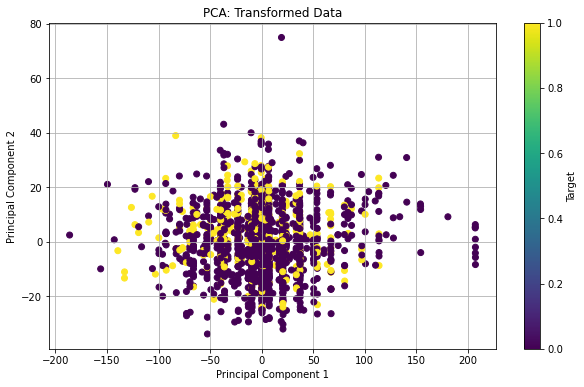

Loadings of each feature on the principal components:
[[-8.37939110e-03  9.47323946e-04  1.58337370e-03  1.46156744e-04
  -4.52217998e-05 -6.59041140e-03 -3.46383705e-04 -1.77741345e-02
  -1.76184001e-05  1.55478697e-05  8.11704716e-05  6.64521680e-06
  -9.13510416e-05 -1.61013720e-06  6.66374678e-05  1.72689996e-06
   1.05627428e-05  6.28751723e-05  1.36424868e-06 -8.26984801e-06
   6.07024267e-07  3.12510269e-05 -5.90231382e-04 -8.18071350e-05
  -2.73496796e-05 -4.23955231e-05  6.40475918e-04  5.64831996e-05
   2.02197033e-05 -4.81828465e-05 -2.59073817e-04 -1.37300570e-05
  -6.69404139e-05 -2.64839425e-05 -2.19926939e-04 -5.68820068e-05
  -1.08926482e-04  1.87908468e-04 -1.57176836e-04  2.17942095e-04
  -6.62892597e-01 -3.47097726e-01  4.45368310e-04  1.71888735e-03
   2.63973285e-04  4.67295806e-05  1.42024415e-04  2.42178596e-04
  -1.45572189e-03  1.05665008e-05  5.85859059e-05  1.54276720e-04
  -1.18557654e-03  2.67378434e-04 -1.81318936e-04  6.39581264e-05
  -3.15935792e-04  2.7

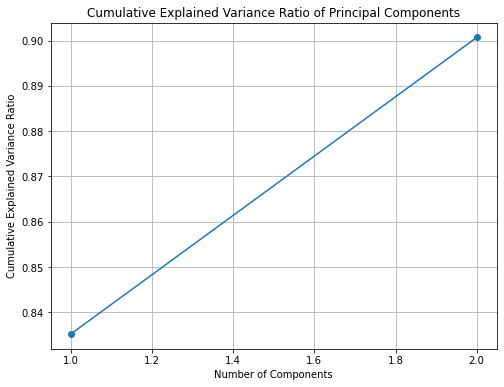

In [37]:
y = data['ZSN']
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Transformed Data')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()
# Analyze the loadings of each feature on the principal components
loadings = pca.components_
print("Loadings of each feature on the principal components:")
print(loadings)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create an array for the component numbers
component_numbers = np.arange(1, len(cumulative_variance_ratio) + 1)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(component_numbers, cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

No major changes

## UMAP

Here you can play around with different target variables

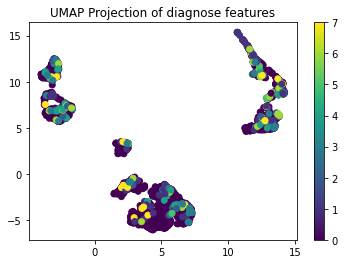

In [52]:
import umap
umap_calculator = umap.UMAP(n_components=2)
umap_projection = umap_calculator.fit_transform(data[features_of_interest])

plt.scatter(umap_projection[:, 0], umap_projection[:, 1], c=data['LET_IS'], cmap='viridis')
plt.colorbar()
plt.title("UMAP Projection of diagnose features")
plt.show()

Unfortunately there is no obvious grouping for different outcomes.

# **DATA PREDICTION**

## **Most important features with Decision Tree and Random Forest**

Here we should produce dummy variables. Categorical variables should not be used in inference with ascending order if there is no meaning to it. --> We need to double check all categorical features

In [38]:
# Declare y and X
y = data_imputed["LET_IS"]
X = data_imputed[features_of_interest]
X.head()

,AGE,SEX,INF_ANAM,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,Angina during last year,Angina one year ago,Angina two years ago,Angina three years ago,Angina 4-5 years ago,Angina >5 years ago,stage I heart failure,stage II heart failure right vs,stage II heart failure left vs,stage IIB heart failure,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,anterior no QRS change,anterior QR,anterior Qr,anterior QS,lateral no QRS change,lateral QR,lateral Qr,lateral QS,inferior no QRS change,inferior QR,inferior Qr,inferior QS,posterior no QRS change,posterior QR,posterior Qr,posterior QS,IM_PG_P,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,S_AD_ORIT,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12
0,77.0,1.0,2.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4.7,0.0,138.0,0.481455,0.263717,8.000000,16.00000,4.0,0.0,0.0,1.0,180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,3.5,0.0,132.0,0.380000,0.180000,7.800000,3.00000,2.0,0.0,0.0,0.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4.0,0.0,132.0,0.300000,0.110000,10.800000,13.44489,3.0,3.0,0.0,0.0,180.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,3.9,0.0,146.0,0.750000,0.370000,8.782914,13.44489,2.0,0.0,0.0,1.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,1.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,3.5,0.0,132.0,0.450000,0.220000,8.300000,13.44489,9.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

AGE                                0.074615
SEX                                0.000000
INF_ANAM                           0.033901
FK_STENOK                          0.004011
IBS_POST                           0.007604
GB                                 0.022020
SIM_GIPERT                         0.000000
DLIT_AG                            0.020712
nr_11                              0.000000
nr_01                              0.000000
nr_02                              0.005773
nr_03                              0.005882
nr_04                              0.014605
nr_07                              0.002535
nr_08                              0.000000
np_01                              0.000000
np_04                              0.000000
np_05                              0.000000
np_07                              0.000000
np_08                              0.000000
np_09                              0.000000
np_10                              0.007788
endocr_01                       

<Axes: >

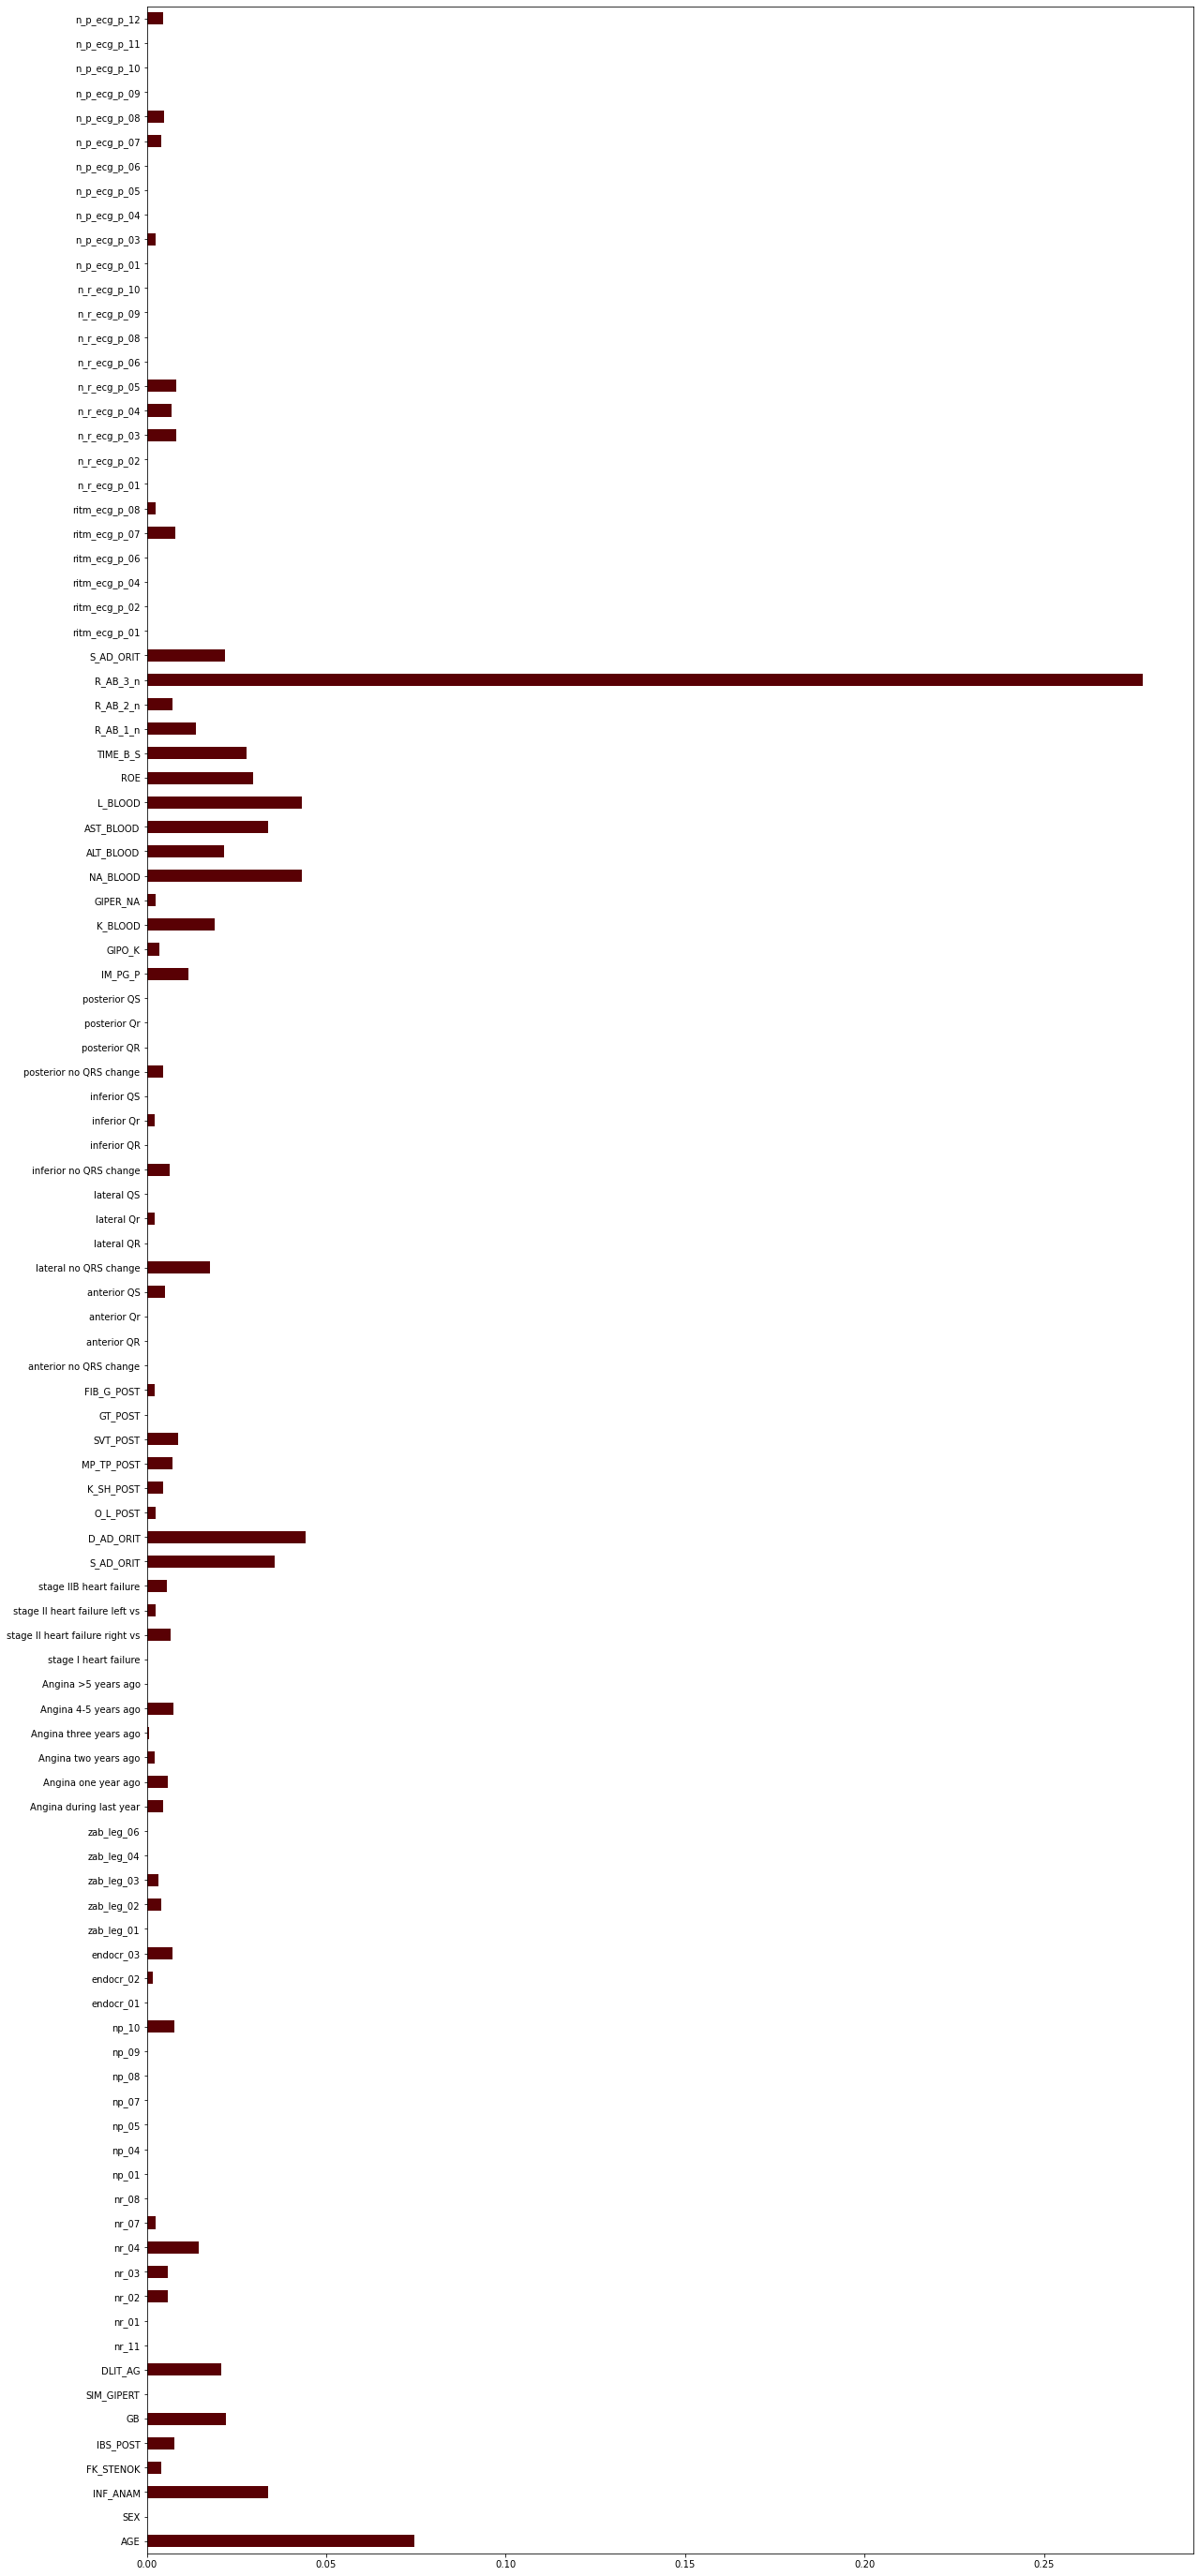

In [41]:
feat_importances_DT = pd.Series(model.feature_importances_, index=X_train.columns)
print(feat_importances_DT) #printing the feature importances because the other values are so small they do not show up on the graph
plt.figure(figsize=(20,50))
feat_importances_DT.plot(kind='barh', color = "#590004")

AGE                                0.044489
SEX                                0.010524
INF_ANAM                           0.015808
FK_STENOK                          0.013388
IBS_POST                           0.014152
GB                                 0.014566
SIM_GIPERT                         0.003371
DLIT_AG                            0.019541
nr_11                              0.001435
nr_01                              0.001184
nr_02                              0.002276
nr_03                              0.004522
nr_04                              0.006863
nr_07                              0.003647
nr_08                              0.001279
np_01                              0.003117
np_04                              0.002865
np_05                              0.002048
np_07                              0.003087
np_08                              0.003473
np_09                              0.002646
np_10                              0.003080
endocr_01                       

<Axes: >

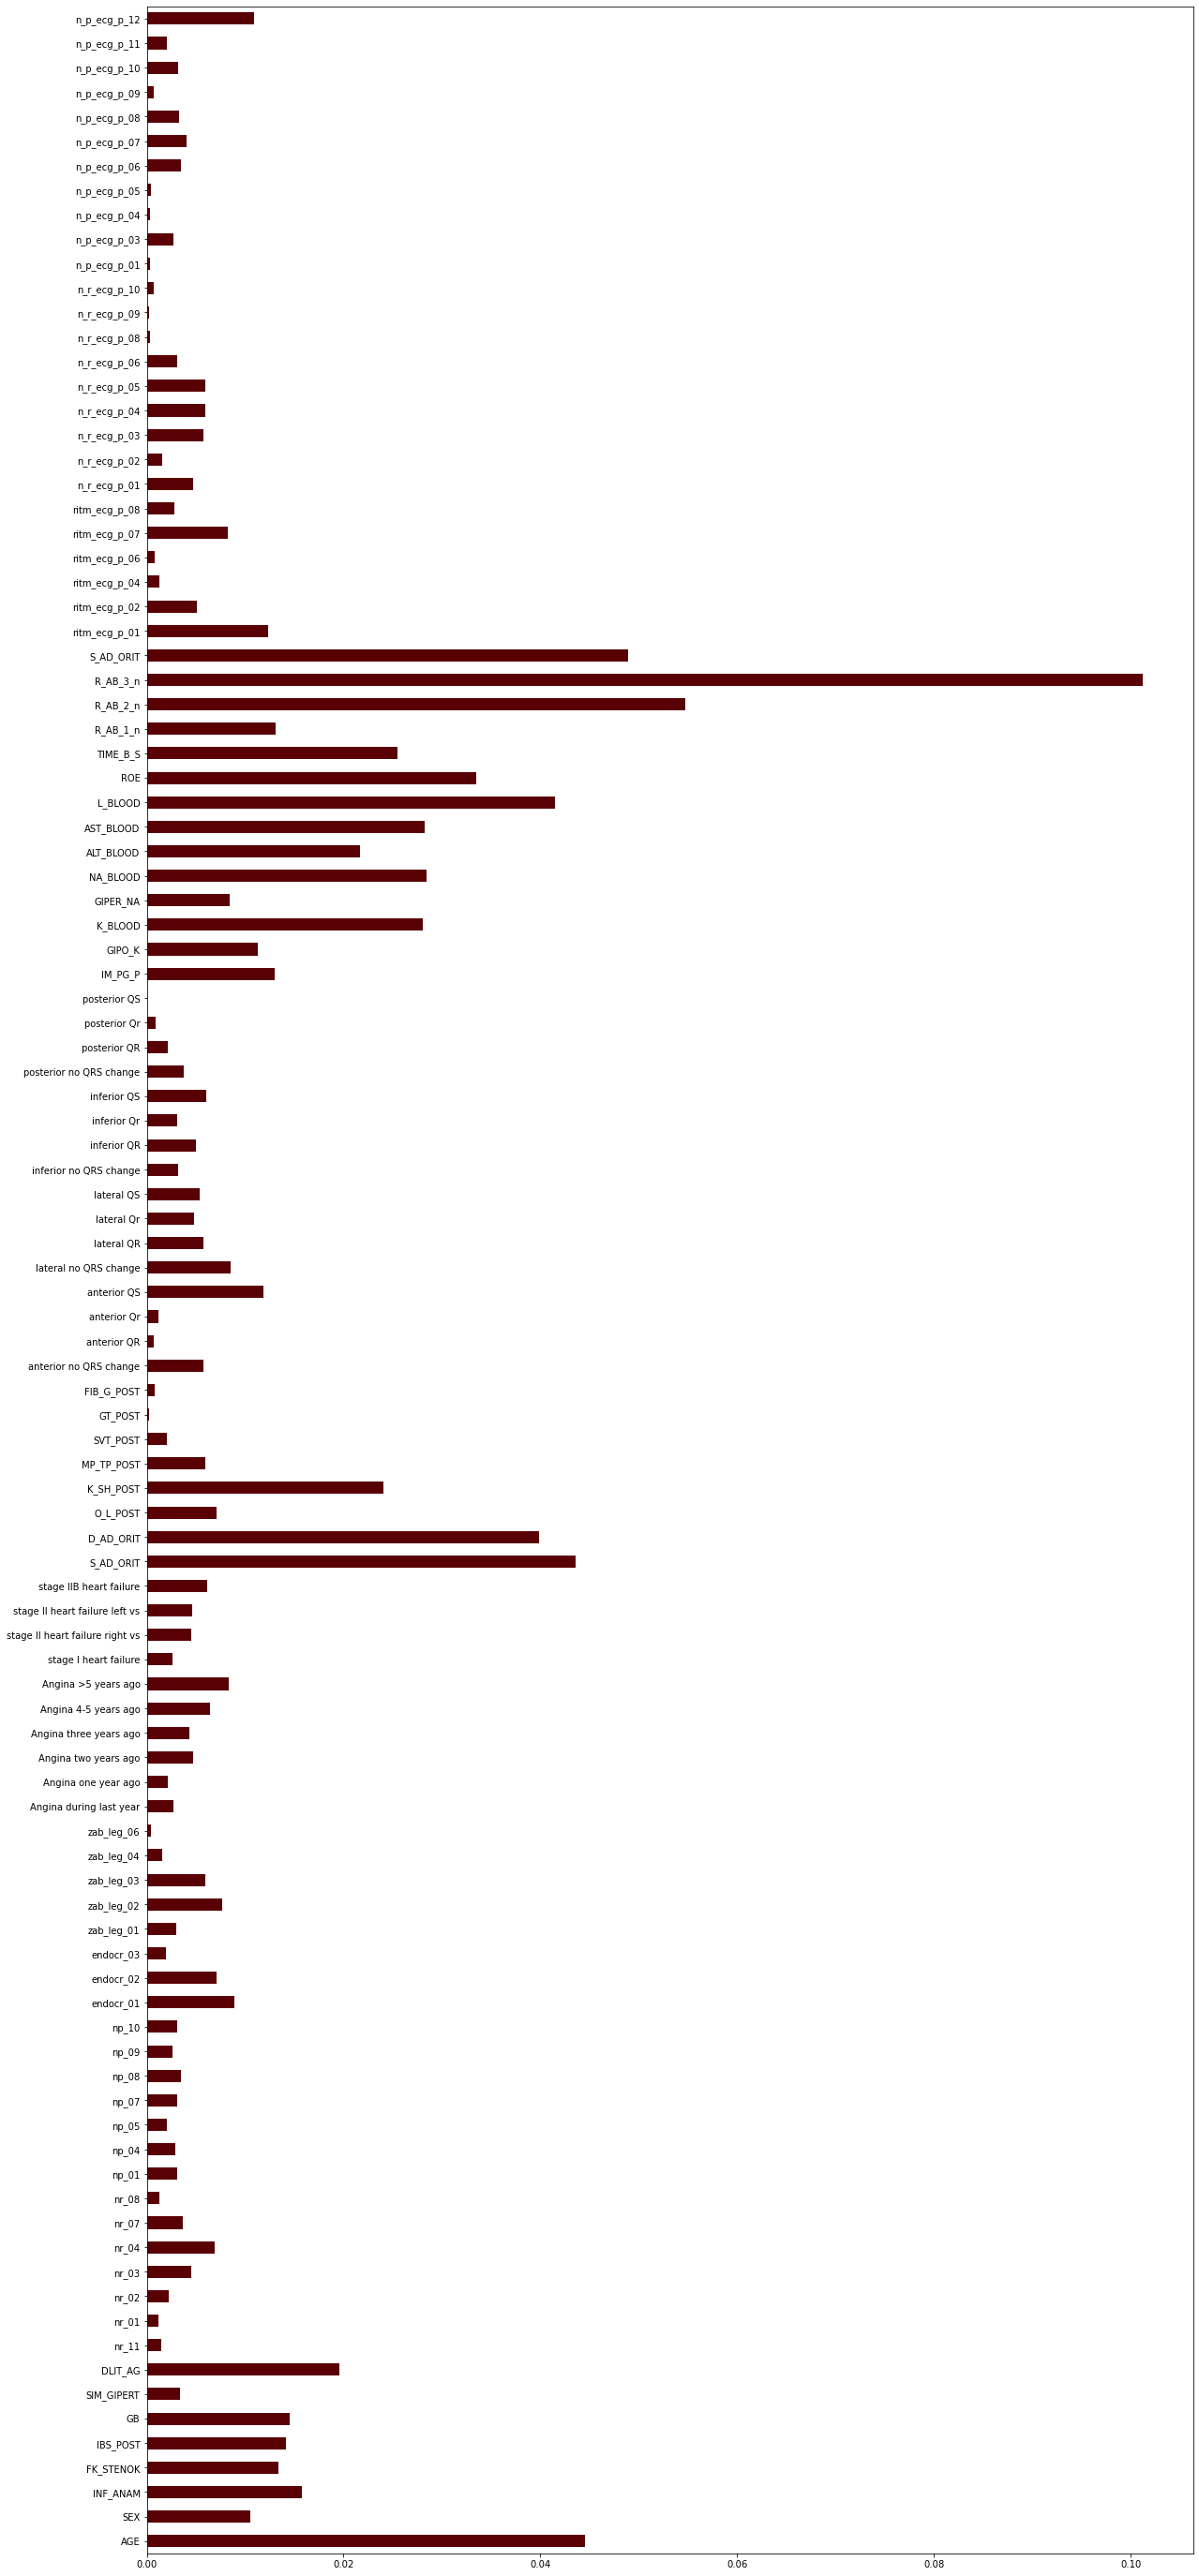

In [42]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
feat_importances_RF = pd.Series(rfc.feature_importances_, index=X_train.columns)
print(feat_importances_RF) #printing the feature importances because the other values are so small they do not show up on the graph
plt.figure(figsize=(20, 50))
feat_importances_RF.plot(kind='barh', color = "#590004")

In [43]:
#extracting columns where both decision tree and random forest were 0
zero_cols = (feat_importances_DT < 0.001) & (feat_importances_RF < 0.001)
zero_cols_names = (zero_cols[zero_cols].index.tolist())
print(len(zero_cols_names))
print(zero_cols_names)

13
['zab_leg_06', 'GT_POST', 'anterior QR', 'posterior Qr', 'posterior QS', 'ritm_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_09']


In [44]:
print(feat_importances_DT.sort_values(ascending=False)[0:10]) #top 10 features
print(feat_importances_RF.sort_values(ascending=False)[0:10]) #top 10 features

R_AB_3_n     0.277638
AGE          0.074615
D_AD_ORIT    0.044174
L_BLOOD      0.043182
NA_BLOOD     0.043163
S_AD_ORIT    0.035748
INF_ANAM     0.033901
AST_BLOOD    0.033846
ROE          0.029703
TIME_B_S     0.027913
dtype: float64
R_AB_3_n     0.101261
R_AB_2_n     0.054740
S_AD_ORIT    0.048922
AGE          0.044489
S_AD_ORIT    0.043588
L_BLOOD      0.041449
D_AD_ORIT    0.039871
ROE          0.033448
NA_BLOOD     0.028434
AST_BLOOD    0.028243
dtype: float64


Relapse of pain in the third day of hospital period has the most weight, while the second strongest predictor is ambiguous

## **Prediction of Myocardial Rupture with SVM**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

X_svm6= data_imputed[features_of_interest]
y_svm6 = data_imputed['RAZRIV']

X_train6, X_test6, y_train6, y_test6 = train_test_split(X_svm6, y_svm6, test_size=0.2, random_state=42)

# SVM model
svm_classifier6 = SVC(kernel='linear', probability=True)
svm_classifier6.fit(X_train6, y_train6)

# Get the coefficients associated with all features
coefficients6 = abs(svm_classifier6.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients6 = {X_svm6.columns[i]: coefficients6[i] for i in range(len(coefficients6))}

# Sort coefficients
sorted_feature_coefficients6 = dict(sorted(feature_coefficients6.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients6.items():
    print(f"Feature: {feature}, Importance: {importance}")


Feature: n_p_ecg_p_08, Importance: 0.3569891224141317
Feature: np_01, Importance: 0.3212748015502228
Feature: SIM_GIPERT, Importance: 0.25265268687730025
Feature: lateral Qr, Importance: 0.19724621887390192
Feature: stage I heart failure, Importance: 0.18377884500492642
Feature: nr_01, Importance: 0.17993268246832828
Feature: ALT_BLOOD, Importance: 0.15278001143707734
Feature: Angina two years ago, Importance: 0.15099783133803535
Feature: anterior no QRS change, Importance: 0.14010580342092904
Feature: FIB_G_POST, Importance: 0.13853106402162263
Feature: Angina during last year, Importance: 0.13009305787803682
Feature: nr_02, Importance: 0.11526584179603883
Feature: lateral QR, Importance: 0.10875896399613172
Feature: Angina three years ago, Importance: 0.1036378455308542
Feature: n_r_ecg_p_05, Importance: 0.10158113948814407
Feature: stage II heart failure left vs, Importance: 0.09341128373603658
Feature: n_p_ecg_p_03, Importance: 0.08938867194264066
Feature: stage II heart failure ri

{'n_p_ecg_p_08': 0.3569891224141317, 'np_01': 0.3212748015502228, 'SIM_GIPERT': 0.25265268687730025, 'lateral Qr': 0.19724621887390192, 'stage I heart failure': 0.18377884500492642}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\4156515850.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['LBBB posterior branch on ECG at admission',


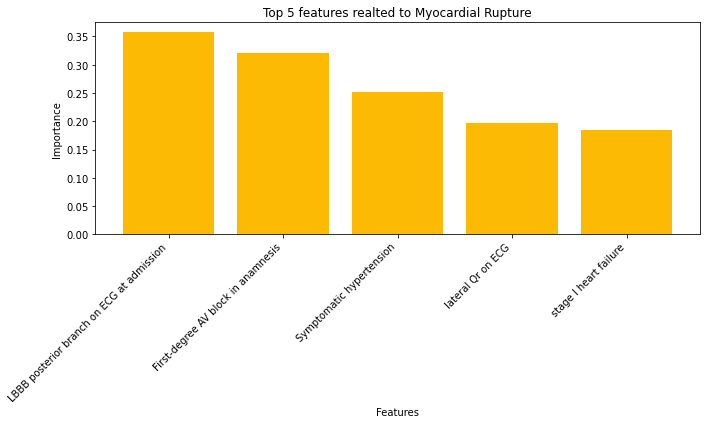

In [59]:
# Take the top 5 features
top_features6= dict(list(sorted_feature_coefficients6.items())[:5])
print(top_features6)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features6.keys(), top_features6.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Myocardial Rupture')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['LBBB posterior branch on ECG at admission',
                           'First-degree AV block in anamnesis',
                           'Symptomatic hypertension',
                           'lateral Qr on ECG',
                           'stage I heart failure'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [60]:
y_pred6= svm_classifier6.predict(X_test6)

# Calculate accuracy
accuracy6 = accuracy_score(y_test6, y_pred6)
print("Accuracy:", accuracy6)

Accuracy: 0.9676470588235294


Check similarity just with patient interview

In [61]:
X_pdi = data_imputed[interview_columns]
y_pdi = data_imputed['RAZRIV']

X_train_pdi, X_test_pdi, y_train_pdi, y_test_pdi = train_test_split(X_pdi, y_pdi, test_size=0.2, random_state=42)

# SVM model
svm_classifier_pdi = SVC(kernel='linear', probability=True)
svm_classifier_pdi.fit(X_train_pdi, y_train_pdi)

# Get the coefficients associated with all features
coefficients_pdi = abs(svm_classifier_pdi.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients_pdi = {X_pdi.columns[i]: coefficients_pdi[i] for i in range(len(coefficients_pdi))}

# Sort coefficients
sorted_feature_coefficients_pdi = dict(sorted(feature_coefficients_pdi.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients_pdi.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: zab_leg_06, Importance: 0.01299468399291199
Feature: np_01, Importance: 0.008743791808102808
Feature: endocr_03, Importance: 0.007692307692307693
Feature: zab_leg_04, Importance: 0.005316007088009451
Feature: Angina during last year, Importance: 0.0028397791878200795
Feature: Angina three years ago, Importance: 0.0026177642169820103
Feature: stage I heart failure, Importance: 0.0023466656700389388
Feature: SIM_GIPERT, Importance: 0.0023197932657756937
Feature: zab_leg_03, Importance: 0.0021098045324854375
Feature: nr_04, Importance: 0.001920147391655691
Feature: Angina 4-5 years ago, Importance: 0.0018831118728961371
Feature: np_04, Importance: 0.0017835909631391202
Feature: np_10, Importance: 0.001514594932697431
Feature: nr_08, Importance: 0.0013045464729585022
Feature: zab_leg_02, Importance: 0.0012607892695912781
Feature: np_09, Importance: 0.0011890606420927466
Feature: endocr_02, Importance: 0.0011291456260367205
Feature: nr_02, Importance: 0.0009687870456320802
Feature:

{'zab_leg_06': 0.01299468399291199, 'np_01': 0.008743791808102808, 'endocr_03': 0.007692307692307693, 'zab_leg_04': 0.005316007088009451, 'Angina during last year': 0.0028397791878200795}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\3873830402.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Pulmonary tuberculosis in anamnesis ',


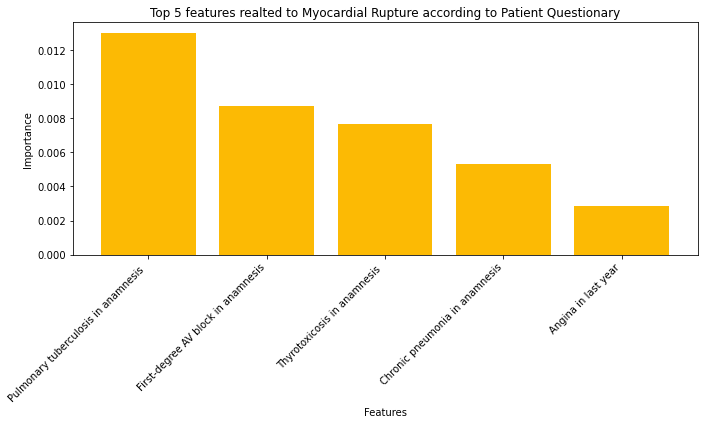

In [63]:
# Take the top 5 features
top_features_pdi= dict(list(sorted_feature_coefficients_pdi.items())[:5])
print(top_features_pdi)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features_pdi.keys(), top_features_pdi.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Myocardial Rupture according to Patient Questionary')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Pulmonary tuberculosis in anamnesis ',
                           'First-degree AV block in anamnesis',
                           'Thyrotoxicosis in anamnesis ',
                           'Chronic pneumonia in anamnesis',
                           'Angina in last year'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

## **Prediction of Ventricular Fibrillation with SVM**

Detection of features most related to Ventricular fibrillation (just the ones obtained in the patient-doctor interview / medical history)

In [64]:
# I took all features at admission and all features at ICU
X_svm = data_imputed[features_of_interest]
y_svm = data_imputed['FIBR_JELUD']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

#SVM model
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_svm, y_svm.ravel())

# Get the coefficients associated with all features
coefficients = abs(svm_classifier.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients = {X.columns[i]: coefficients[i] for i in range(len(coefficients))}

# Sort coefficients
sorted_feature_coefficients = dict(sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: n_r_ecg_p_10, Importance: 1.9993065612507162
Feature: SVT_POST, Importance: 0.5084775911949907
Feature: n_r_ecg_p_08, Importance: 0.48065685832065885
Feature: K_SH_POST, Importance: 0.11026138445445752
Feature: np_01, Importance: 0.054987767639177516
Feature: nr_04, Importance: 0.05013306779467465
Feature: ritm_ecg_p_04, Importance: 0.045984729628512966
Feature: stage IIB heart failure, Importance: 0.03451129336159826
Feature: n_p_ecg_p_08, Importance: 0.03413078028532579
Feature: n_p_ecg_p_04, Importance: 0.033983431181879624
Feature: n_p_ecg_p_06, Importance: 0.03199106023054643
Feature: n_p_ecg_p_03, Importance: 0.028571287741141482
Feature: nr_02, Importance: 0.027487386701581656
Feature: stage II heart failure right vs, Importance: 0.02410384311127256
Feature: ritm_ecg_p_07, Importance: 0.023679402837588626
Feature: Angina during last year, Importance: 0.02297756663907169
Feature: ritm_ecg_p_02, Importance: 0.02292643556641405
Feature: stage I heart failure, Importance: 0

{'n_r_ecg_p_10': 1.9993065612507162, 'SVT_POST': 0.5084775911949907, 'n_r_ecg_p_08': 0.48065685832065885, 'K_SH_POST': 0.11026138445445752, 'np_01': 0.054987767639177516}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\4121265683.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Ventricular fibrillation on ECG at the time of admission',


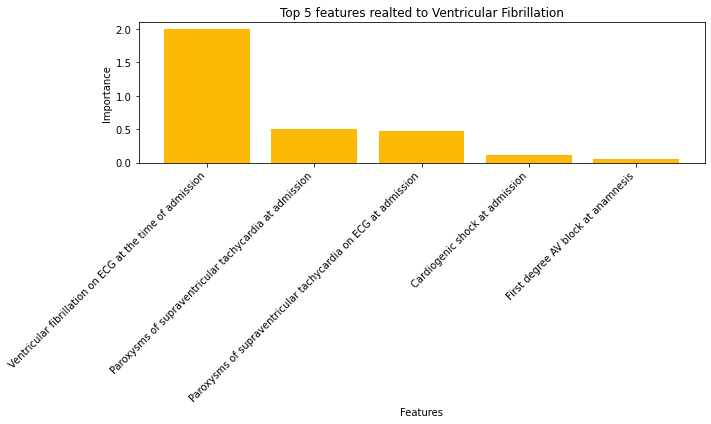

In [66]:
# Take the top 5 features
top_features = dict(list(sorted_feature_coefficients.items())[:5])
print(top_features)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features.keys(), top_features.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Ventricular fibrillation on ECG at the time of admission',
                           'Paroxysms of supraventricular tachycardia at admission',
                           'Paroxysms of supraventricular tachycardia on ECG at admission',
                           'Cardiogenic shock at admission',
                           'First degree AV block at anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
#I think these names need correction to: Atrial fibrillation, Paroxysms of atrial fibrillation, Premature ventricular contractions,
#irregular heartbeat and hypertension
plt.tight_layout()
plt.show()

In [67]:
# Prediction with y_test to check accuracy
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.961764705882353


In [68]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       327
         1.0       0.00      0.00      0.00        13

    accuracy                           0.96       340
   macro avg       0.48      0.50      0.49       340
weighted avg       0.92      0.96      0.94       340

Mean Squared Error: 0.03823529411764706


C:\Users\Jasmine\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jasmine\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jasmine\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


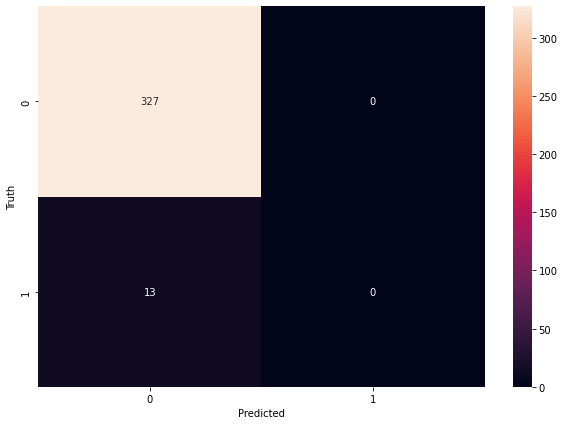

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

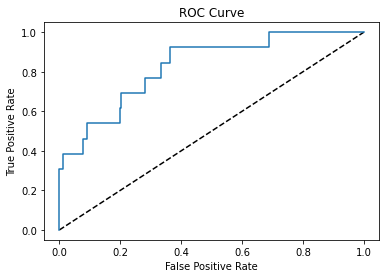

AUC:  0.8270995059985886


In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the predictions
y_pred_proba = svm_classifier.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate and print the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

Check similarity just with patient questionary

In [71]:
X_pdi = data_imputed[interview_columns]
y_pdi = data_imputed['FIBR_JELUD']

X_train_pdi, X_test_pdi, y_train_pdi, y_test_pdi = train_test_split(X_pdi, y_pdi, test_size=0.2, random_state=42)

# SVM model
svm_classifier_pdi = SVC(kernel='linear', probability=True)
svm_classifier_pdi.fit(X_train_pdi, y_train_pdi)

# Get the coefficients associated with all features
coefficients_pdi = abs(svm_classifier_pdi.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients_pdi = {X_pdi.columns[i]: coefficients_pdi[i] for i in range(len(coefficients_pdi))}

# Sort coefficients
sorted_feature_coefficients_pdi = dict(sorted(feature_coefficients_pdi.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients_pdi.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: endocr_02, Importance: 0.02485207100591716
Feature: zab_leg_06, Importance: 0.01299468399291199
Feature: zab_leg_04, Importance: 0.005316007088009451
Feature: Angina 4-5 years ago, Importance: 0.0008480832790214166
Feature: Angina one year ago, Importance: 0.0007620477734056053
Feature: Angina two years ago, Importance: 0.0007033994046983238
Feature: Angina three years ago, Importance: 0.0005068940841224112
Feature: Angina during last year, Importance: 0.000486296824089294
Feature: nr_11, Importance: 0.00035356133049110547
Feature: Angina >5 years ago, Importance: 0.00034712356087851504
Feature: endocr_03, Importance: 0.0003268608563022912
Feature: nr_04, Importance: 0.00024513687805749473
Feature: GB, Importance: 0.00021108426650240375
Feature: stage I heart failure, Importance: 0.00016950451228670005
Feature: stage II heart failure left vs, Importance: 0.0001615688798440873
Feature: INF_ANAM, Importance: 0.00016142648357231337
Feature: zab_leg_02, Importance: 0.0001398541267

{'endocr_02': 0.02485207100591716, 'zab_leg_06': 0.01299468399291199, 'zab_leg_04': 0.005316007088009451, 'Angina 4-5 years ago': 0.0008480832790214166, 'Angina one year ago': 0.0007620477734056053}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\563814201.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['LBBB posterior branch on ECG at admission',


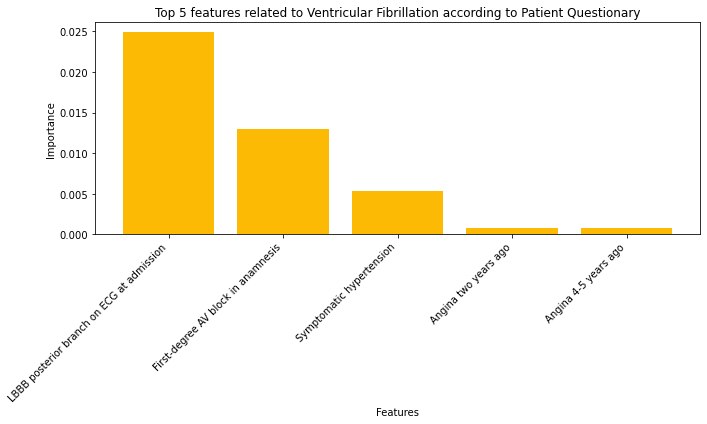

In [72]:
# Take the top 5 features
top_features_pdi2= dict(list(sorted_feature_coefficients_pdi.items())[:5])
print(top_features_pdi2)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features_pdi2.keys(), top_features_pdi2.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features related to Ventricular Fibrillation according to Patient Questionary')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['LBBB posterior branch on ECG at admission',
                           'First-degree AV block in anamnesis',
                           'Symptomatic hypertension',
                           'Angina two years ago',
                           'Angina 4-5 years ago'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

## **Prediction of Cardiogenic Shock with SVM**


In [85]:
X_svm11 = data_imputed[features_of_interest]
y_svm11 = one_hot_data['cardiogenic_shock']

X_train11, X_test11, y_train11, y_test11 = train_test_split(X_svm11, y_svm11, test_size=0.2, random_state=42)

# SVM model
svm_classifier11 = SVC(kernel='linear', probability=True)
svm_classifier11.fit(X_train11, y_train11)

# Get the coefficients associated with all features
coefficients11 = abs(svm_classifier11.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients11 = {X_svm11.columns[i]: coefficients11[i] for i in range(len(coefficients11))}

# Sort coefficients
sorted_feature_coefficients11 = dict(sorted(feature_coefficients11.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients11.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: K_SH_POST, Importance: 1.7918378342963115
Feature: SVT_POST, Importance: 1.001517342326592
Feature: np_04, Importance: 0.6240915932490574
Feature: np_05, Importance: 0.43372415255092694
Feature: np_09, Importance: 0.4242352511291111
Feature: GT_POST, Importance: 0.4233069913686879
Feature: stage I heart failure, Importance: 0.4097178208372678
Feature: zab_leg_04, Importance: 0.38844488241211095
Feature: n_p_ecg_p_06, Importance: 0.38040342733563826
Feature: anterior QR, Importance: 0.3504177415499785
Feature: IM_PG_P, Importance: 0.3489763826713119
Feature: ritm_ecg_p_07, Importance: 0.3134889029606409
Feature: endocr_02, Importance: 0.30379554984671575
Feature: n_r_ecg_p_05, Importance: 0.30203345896519895
Feature: ritm_ecg_p_04, Importance: 0.28916446301129795
Feature: zab_leg_01, Importance: 0.28405296512872447
Feature: ritm_ecg_p_01, Importance: 0.27801101155851793
Feature: nr_08, Importance: 0.2768576463522378
Feature: n_r_ecg_p_01, Importance: 0.2753929213127294
Feature:

{'K_SH_POST': 1.7918378342963115, 'SVT_POST': 1.001517342326592, 'np_04': 0.6240915932490574, 'np_05': 0.43372415255092694, 'np_09': 0.4242352511291111}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\4117632506.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Cardiogenic shock at the time of admission',


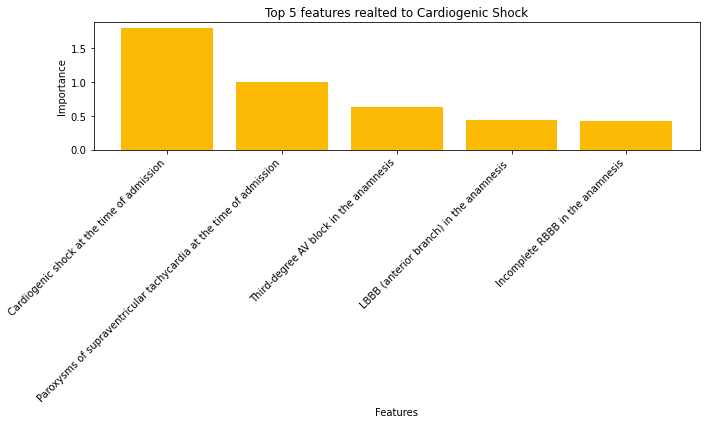

In [86]:
# Take the top 5 features
top_features11= dict(list(sorted_feature_coefficients11.items())[:5])
print(top_features11)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features11.keys(), top_features11.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Cardiogenic Shock')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Cardiogenic shock at the time of admission',
                           'Paroxysms of supraventricular tachycardia at the time of admission',
                           'Third-degree AV block in the anamnesis',
                           'LBBB (anterior branch) in the anamnesis ',
                           'Incomplete RBBB in the anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [88]:
y_pred11= svm_classifier11.predict(X_test11)

# Calculate accuracy
accuracy11 = accuracy_score(y_test11, y_pred11)
print("Accuracy:", accuracy11)

Accuracy: 0.9647058823529412


Check similarity just with patient questionary

In [91]:
X_pdi = data_imputed[interview_columns]
y_pdi = one_hot_data['cardiogenic_shock']

X_train_pdi, X_test_pdi, y_train_pdi, y_test_pdi = train_test_split(X_pdi, y_pdi, test_size=0.2, random_state=42)

# SVM model
svm_classifier_pdi = SVC(kernel='linear', probability=True)
svm_classifier_pdi.fit(X_train_pdi, y_train_pdi)

# Get the coefficients associated with all features
coefficients_pdi = abs(svm_classifier_pdi.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients_pdi = {X_pdi.columns[i]: coefficients_pdi[i] for i in range(len(coefficients_pdi))}

# Sort coefficients
sorted_feature_coefficients_pdi3 = dict(sorted(feature_coefficients_pdi.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients_pdi3.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: np_04, Importance: 0.01248513674197378
Feature: np_10, Importance: 0.0062209399695260644
Feature: np_08, Importance: 0.005341983039073284
Feature: np_01, Importance: 0.004598238356936695
Feature: nr_07, Importance: 0.004169148302561049
Feature: np_07, Importance: 0.004161712247324614
Feature: stage I heart failure, Importance: 0.0037627111114661186
Feature: nr_11, Importance: 0.0031442785068945753
Feature: stage IIB heart failure, Importance: 0.0030453093302984513
Feature: np_05, Importance: 0.0029837226000782903
Feature: Angina 4-5 years ago, Importance: 0.0029248643727424195
Feature: zab_leg_04, Importance: 0.0028185591467457805
Feature: stage II heart failure left vs, Importance: 0.0024142825108315336
Feature: np_09, Importance: 0.0018032410174061344
Feature: stage II heart failure right vs, Importance: 0.001644377059523805
Feature: Angina two years ago, Importance: 0.0015012919300172456
Feature: Angina >5 years ago, Importance: 0.001493107504185076
Feature: endocr_03, Impo

{'np_04': 0.01248513674197378, 'np_10': 0.0062209399695260644, 'np_08': 0.005341983039073284, 'np_01': 0.004598238356936695, 'nr_07': 0.004169148302561049}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\799531211.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Third-degree AV block in the anamnesis',


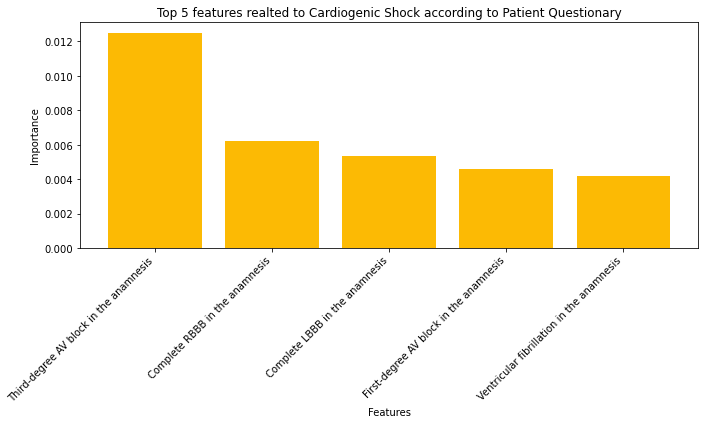

In [92]:
# Take the top 5 features
top_features_pdi3= dict(list(sorted_feature_coefficients_pdi3.items())[:5])
print(top_features_pdi3)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features_pdi3.keys(), top_features_pdi3.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Cardiogenic Shock according to Patient Questionary')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Third-degree AV block in the anamnesis',
                           'Complete RBBB in the anamnesis',
                           'Complete LBBB in the anamnesis',
                           'First-degree AV block in the anamnesis',
                           'Ventricular fibrillation in the anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

## **Prediction of Chronic Heart Failure with SVM**

In [80]:
X_svm8 = data_imputed[features_of_interest]
y_svm8 = data_imputed['ZSN']

X_train8, X_test8, y_train8, y_test8 = train_test_split(X_svm8, y_svm8, test_size=0.2, random_state=42)

# SVM model
svm_classifier8 = SVC(kernel='linear', probability=True)
svm_classifier8.fit(X_train8, y_train8)

# Get the coefficients associated with all features
coefficients8 = abs(svm_classifier8.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients8 = {X_svm8.columns[i]: coefficients8[i] for i in range(len(coefficients8))}

# Sort coefficients
sorted_feature_coefficients8 = dict(sorted(feature_coefficients8.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients8.items():
    print(f"Feature: {feature}, Importance: {importance}")


Feature: stage I heart failure, Importance: 2.1012068006758673
Feature: np_09, Importance: 1.9976430746032934
Feature: np_10, Importance: 1.1058103698303212
Feature: K_SH_POST, Importance: 1.0471843120512847
Feature: n_r_ecg_p_06, Importance: 1.0224054500156736
Feature: n_p_ecg_p_04, Importance: 1.0125839404635935
Feature: np_08, Importance: 1.0070707761901192
Feature: nr_07, Importance: 0.9982238390359558
Feature: SVT_POST, Importance: 0.9952606635071088
Feature: nr_01, Importance: 0.9928953561438234
Feature: ritm_ecg_p_04, Importance: 0.9645694170237205
Feature: n_p_ecg_p_06, Importance: 0.9280887726925595
Feature: nr_08, Importance: 0.2039860669809668
Feature: zab_leg_04, Importance: 0.1504803530850436
Feature: n_r_ecg_p_10, Importance: 0.13184871463280934
Feature: n_r_ecg_p_05, Importance: 0.11340273561878256
Feature: nr_02, Importance: 0.09043838867653076
Feature: n_p_ecg_p_09, Importance: 0.0900999073176485
Feature: lateral QR, Importance: 0.08214996648357697
Feature: n_p_ecg_p_1

{'stage I heart failure': 2.1012068006758673, 'np_09': 1.9976430746032934, 'np_10': 1.1058103698303212, 'K_SH_POST': 1.0471843120512847, 'n_r_ecg_p_06': 1.0224054500156736}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\1098719969.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Stage I heart failure',


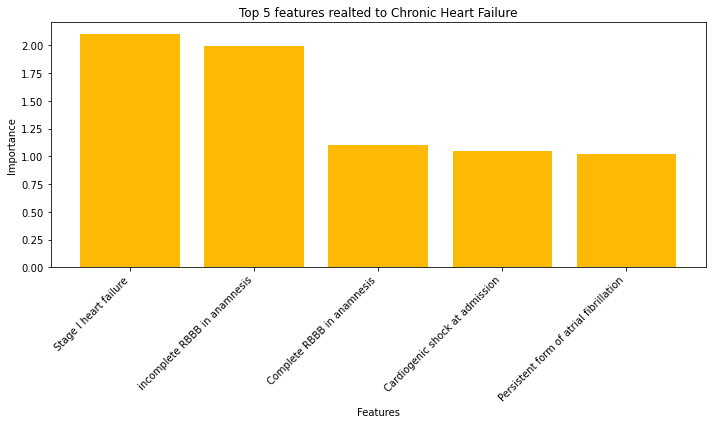

In [93]:
# Take the top 5 features
top_features8= dict(list(sorted_feature_coefficients8.items())[:5])
print(top_features8)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features8.keys(), top_features8.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Chronic Heart Failure')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Stage I heart failure',
                           'incomplete RBBB in anamnesis',
                           'Complete RBBB in anamnesis',
                           'Cardiogenic shock at admission',
                           'Persistent form of atrial fibrillation'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [102]:
y_pred8= svm_classifier8.predict(X_test8)

# Calculate accuracy
accuracy8 = accuracy_score(y_test8, y_pred8)
print("Accuracy:", accuracy8)

Accuracy: 0.8058823529411765


Check similarity just with patient questionary

In [103]:
X_pdi = data_imputed[interview_columns]
y_pdi = data_imputed['ZSN']

X_train_pdi, X_test_pdi, y_train_pdi, y_test_pdi = train_test_split(X_pdi, y_pdi, test_size=0.2, random_state=42)

# SVM model
svm_classifier_pdi = SVC(kernel='linear', probability=True)
svm_classifier_pdi.fit(X_train_pdi, y_train_pdi)

# Get the coefficients associated with all features
coefficients_pdi = abs(svm_classifier_pdi.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients_pdi = {X_pdi.columns[i]: coefficients_pdi[i] for i in range(len(coefficients_pdi))}

# Sort coefficients
sorted_feature_coefficients_pdi4 = dict(sorted(feature_coefficients_pdi.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients_pdi4.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: stage I heart failure, Importance: 2.0098507158529983
Feature: np_09, Importance: 1.9904875148632581
Feature: np_08, Importance: 1.0285374554102258
Feature: nr_07, Importance: 0.9946396664681358
Feature: np_10, Importance: 0.9857312722948868
Feature: nr_01, Importance: 0.9785586658725431
Feature: nr_08, Importance: 0.021441334127456822
Feature: np_04, Importance: 0.01426872770511296
Feature: endocr_03, Importance: 0.00778352694125628
Feature: np_01, Importance: 0.007368648210376083
Feature: nr_04, Importance: 0.006817952652792059
Feature: zab_leg_06, Importance: 0.006085575501021179
Feature: zab_leg_04, Importance: 0.004976774924154714
Feature: np_07, Importance: 0.0047562425683709865
Feature: SIM_GIPERT, Importance: 0.004281404385408472
Feature: nr_02, Importance: 0.0034112061661302207
Feature: endocr_01, Importance: 0.0022759862044168244
Feature: zab_leg_03, Importance: 0.002196699644187561
Feature: zab_leg_01, Importance: 0.0021699361884657264
Feature: stage II heart failur

{'stage I heart failure': 2.0098507158529983, 'np_09': 1.9904875148632581, 'np_08': 1.0285374554102258, 'nr_07': 0.9946396664681358, 'np_10': 0.9857312722948868}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\2336342748.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['stage I heart failure',


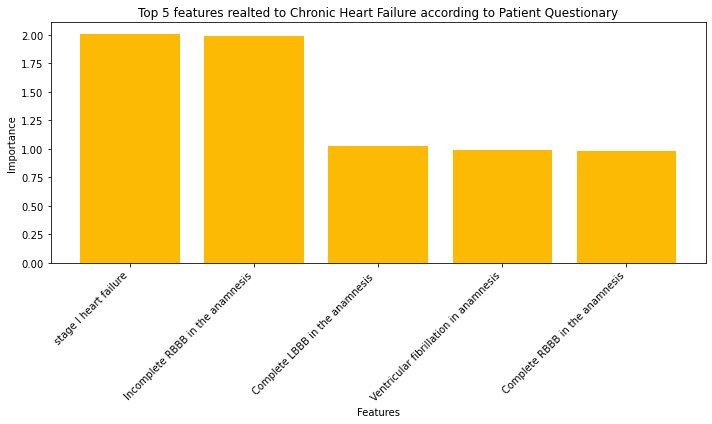

In [104]:
# Take the top 5 features
top_features_pdi4= dict(list(sorted_feature_coefficients_pdi4.items())[:5])
print(top_features_pdi4)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features_pdi4.keys(), top_features_pdi4.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Chronic Heart Failure according to Patient Questionary')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['stage I heart failure',
                           'Incomplete RBBB in the anamnesis',
                           'Complete LBBB in the anamnesis ',
                           'Ventricular fibrillation in anamnesis',
                           'Complete RBBB in the anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

## **Prediction of Pulmonary Edema with SVM**

excessive fluid in the lungs

In [99]:
X_svm5= data_imputed[features_of_interest]
y_svm5 = data_imputed['OTEK_LANC']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_svm5, y_svm5, test_size=0.2, random_state=42)

# SVM model
svm_classifier5 = SVC(kernel='linear', probability=True)
svm_classifier5.fit(X_train5, y_train5)

# Get the coefficients associated with all features
coefficients5 = abs(svm_classifier5.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients5 = {X_svm5.columns[i]: coefficients5[i] for i in range(len(coefficients5))}

# Sort coefficients
sorted_feature_coefficients5 = dict(sorted(feature_coefficients5.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients5.items():
    print(f"Feature: {feature}, Importance: {importance}")


Feature: np_04, Importance: 0.5224446882493018
Feature: nr_08, Importance: 0.47993768220930455
Feature: nr_01, Importance: 0.1334697000810371
Feature: n_p_ecg_p_08, Importance: 0.11427017299960734
Feature: n_r_ecg_p_09, Importance: 0.06885925486957756
Feature: zab_leg_04, Importance: 0.06804212010827215
Feature: n_r_ecg_p_10, Importance: 0.06034063688150664
Feature: np_05, Importance: 0.05571086819973449
Feature: GT_POST, Importance: 0.055006487734888365
Feature: n_r_ecg_p_02, Importance: 0.05068346622191078
Feature: stage IIB heart failure, Importance: 0.04956484652940851
Feature: K_SH_POST, Importance: 0.044286334638204305
Feature: SIM_GIPERT, Importance: 0.03895084619607836
Feature: GIPER_NA, Importance: 0.03823251429837393
Feature: n_p_ecg_p_09, Importance: 0.03593793326382899
Feature: zab_leg_02, Importance: 0.03582484887216353
Feature: ritm_ecg_p_08, Importance: 0.035578074805267035
Feature: FIB_G_POST, Importance: 0.033194824258277425
Feature: stage I heart failure, Importance: 

{'np_04': 0.5224446882493018, 'nr_08': 0.47993768220930455, 'nr_01': 0.1334697000810371, 'n_p_ecg_p_08': 0.11427017299960734, 'n_r_ecg_p_09': 0.06885925486957756}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\1329622250.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Third-degree AV block in anamnesis',


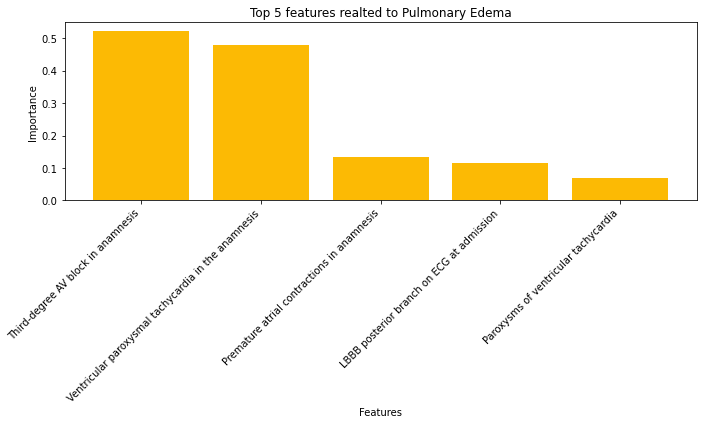

In [105]:
# Take the top 5 features
top_features5= dict(list(sorted_feature_coefficients5.items())[:5])
print(top_features5)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features5.keys(), top_features5.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Pulmonary Edema')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Third-degree AV block in anamnesis',
                           'Ventricular paroxysmal tachycardia in the anamnesis',
                           'Premature atrial contractions in anamnesis',
                           'LBBB posterior branch on ECG at admission',
                           'Paroxysms of ventricular tachycardia'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [106]:
y_pred5= svm_classifier5.predict(X_test5)

# Calculate accuracy
accuracy5 = accuracy_score(y_test5, y_pred5)
print("Accuracy:", accuracy5)

Accuracy: 0.9323529411764706


Check similarity just with patient questionary

In [107]:
X_pdi = data_imputed[interview_columns]
y_pdi = data_imputed['OTEK_LANC']

X_train_pdi, X_test_pdi, y_train_pdi, y_test_pdi = train_test_split(X_pdi, y_pdi, test_size=0.2, random_state=42)

# SVM model
svm_classifier_pdi = SVC(kernel='linear', probability=True)
svm_classifier_pdi.fit(X_train_pdi, y_train_pdi)

# Get the coefficients associated with all features
coefficients_pdi = abs(svm_classifier_pdi.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients_pdi = {X_pdi.columns[i]: coefficients_pdi[i] for i in range(len(coefficients_pdi))}

# Sort coefficients
sorted_feature_coefficients_pdi5 = dict(sorted(feature_coefficients_pdi.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients_pdi5.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: np_04, Importance: 0.506759509043928
Feature: nr_08, Importance: 0.4956228614146782
Feature: np_05, Importance: 0.0032978548833841204
Feature: nr_01, Importance: 0.0028236246887437533
Feature: zab_leg_03, Importance: 0.002589498628382092
Feature: np_10, Importance: 0.0018960536029907216
Feature: SIM_GIPERT, Importance: 0.001867004574813258
Feature: nr_04, Importance: 0.0018521347070095118
Feature: zab_leg_04, Importance: 0.0017688549226873018
Feature: Angina 4-5 years ago, Importance: 0.001498259488171172
Feature: zab_leg_02, Importance: 0.001486288481416409
Feature: endocr_03, Importance: 0.0014255359917764998
Feature: zab_leg_06, Importance: 0.0013574028702793006
Feature: endocr_02, Importance: 0.0013476100304354866
Feature: nr_03, Importance: 0.0013167989152655935
Feature: endocr_01, Importance: 0.0012648234048171503
Feature: stage II heart failure left vs, Importance: 0.001206391485336411
Feature: stage IIB heart failure, Importance: 0.0011921983151972348
Feature: stage I 

{'np_04': 0.506759509043928, 'nr_08': 0.4956228614146782, 'np_05': 0.0032978548833841204, 'nr_01': 0.0028236246887437533, 'zab_leg_03': 0.002589498628382092}


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_6728\3104373483.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Third-degree AV block in anamnesis',


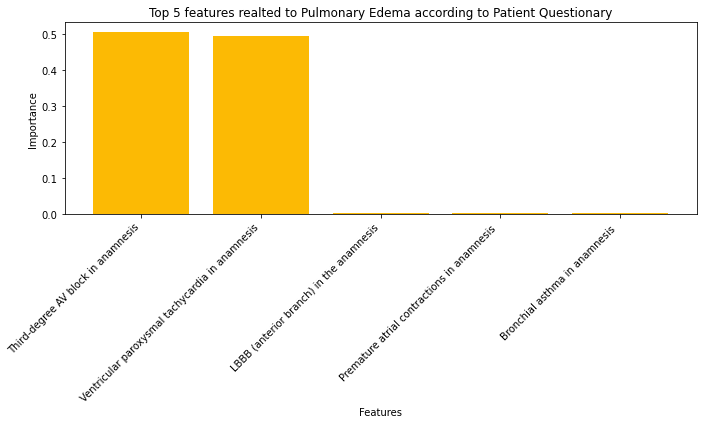

In [110]:
# Take the top 5 features
top_features5= dict(list(sorted_feature_coefficients_pdi5.items())[:5])
print(top_features5)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features5.keys(), top_features5.values(), color='#FCBA04')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Pulmonary Edema according to Patient Questionary')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Third-degree AV block in anamnesis',
                           'Ventricular paroxysmal tachycardia in anamnesis',
                           'LBBB (anterior branch) in the anamnesis',
                           'Premature atrial contractions in anamnesis ',
                           'Bronchial asthma in anamnesis '], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

## **Decision Tree**

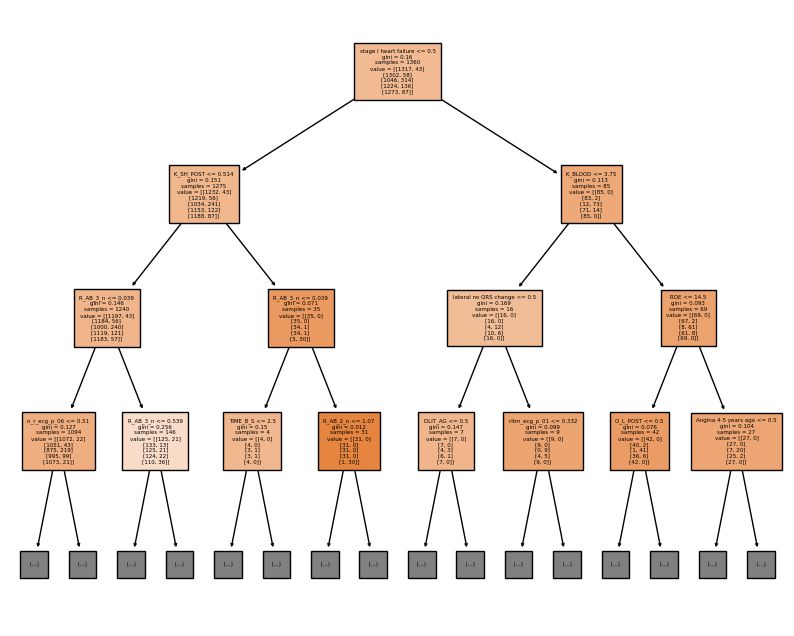

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = data_imputed[features_of_interest]
one_hot_data_df = pd.DataFrame(one_hot_data['cardiogenic_shock'])
y = pd.concat([data_imputed[['RAZRIV', 'FIBR_JELUD', 'ZSN', 'OTEK_LANC']], one_hot_data_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

features = list(X.columns)
importances_dtc = list(dtc.feature_importances_)
feature_importances = list(zip(features, importances_dtc))
feature_importances_sorted = sorted(feature_importances, key=lambda x: x[1], reverse=True)

top_5_feature_names = [feature[0] for feature in feature_importances_sorted[:5]]
# Plot decision tree
plt.figure(figsize=(10, 8))
plot_tree(dtc, fontsize=4, filled=True, class_names=y, feature_names=features, max_depth=3)
plt.show()